# Исследование закономерностей, определяющих успех компьютерных игр

## Подготовительный этап

### Описание исследования

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

P.S. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание исходных данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Цель и задачи исследования

**Цель**

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Задачи**
1. Подготовить данные для анализа (обработать дубликаты, пропуски в данных, изменить типы данных и др.)
2. Провести EDA
    1. Количество выпущенных игр по годам
    2. Распределение проданных игр по игровым площадкам
    3. Платформы — лидеры по продажам игр
    4. "Ящики с усами" по глобальным продажам игр в разбивке по платформам
    5. Корреляция между продажами и отзывами
3. Нарисовать портрет пользователя каждого региона
4. Проверить гипотезы:
    - о равенстве средних рейтингов платформ
    - о равенстве средних рейтингов жанров
5. Сделать общий вывод

## Исследование

### Технические ячейки

In [1]:
# установил библиотеку missingno
# !pip install missingno

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Загрузка данных

In [3]:
df = pd.read_csv('games.csv')
display(df.shape)
df.head()

(16715, 11)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# посчитал количество уникальных значений
unique_count = df.nunique()

# посчитал количество и долю пропусков
missing_count = df.isna().sum()
missing_percentage = (missing_count * 100 / len(df)).map('{:.0f}%'.format)

# объединил информацию в датафрейм для удобного вывода
info_df = pd.DataFrame({'unique_count': unique_count,
                        'missing_count': missing_count,
                        'missing_percentage': missing_percentage})

info_df

,unique_count,missing_count,missing_percentage
Name,11559,2,0%
Platform,31,0,0%
Year_of_Release,37,269,2%
Genre,12,2,0%
NA_sales,402,0,0%
EU_sales,307,0,0%
JP_sales,244,0,0%
Other_sales,155,0,0%
Critic_Score,82,8578,51%
User_Score,96,6701,40%


In [6]:
# вывел уникальные отсортированные значения для каждой переменной

print('УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ПЕРЕМЕННЫХ', '\n')

for col in df:
    unique_values = df[col].sort_values().unique()
    if len(unique_values) <= 100:
        print('Переменная:', col, '\n', df[col].sort_values().unique(), '\n')

УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ПЕРЕМЕННЫХ 

Переменная: Platform 
 ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne'] 

Переменная: Year_of_Release 
 [1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan] 

Переменная: Genre 
 ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy' nan] 

Переменная: Critic_Score 
 [13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92.

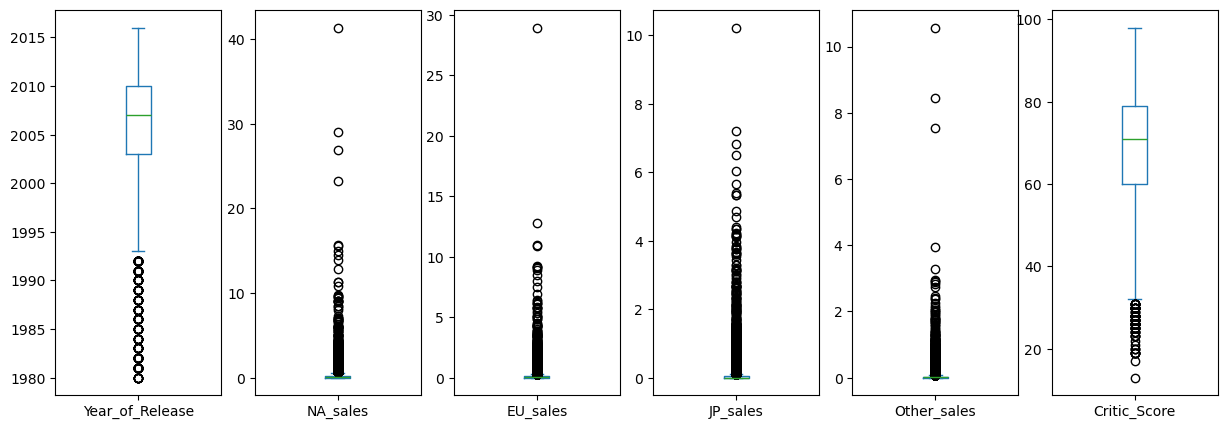

In [7]:
# вывел на экран диаграммы "ящик с усами" для каждой числовой переменной,
# чтобы лучше увидеть возможные выбросы

df.plot(kind='box',
        subplots=True,
        figsize=(15, 5));

**Выводы**

- Представлены данные с 1980 по 2016 год: рост количества игр за период условно экспоненциален
- В данных есть пропуски (особенно для переменных оценивания — 40-50% пропусков) и артефакт (`tbd` в переменной `User_Score`)
- Следующие переменные будут рассмотрены на предмет изменения типа данных:
    - `Platform`, `Genre`, `Rating` — category
    - `Year_of_Release` — datetime [ns]
    - `User_Score` — float64
- В данных возможны выбросы в переменных количества продаж

### Подготовка данных

In [8]:
# изменил регистр названий всех столбцов
# df.rename(columns=lambda x: x.lower(), inplace=True)
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработка дубликатов

In [9]:
# проверил датафрейм на наличие явных дубликатов
df.duplicated().sum()

0

Единственным столбцом с дубликатами может быть `df['name']` — значения остальных столбцов я просмотрел вручную.

In [10]:
# назначил переменную с датафреймом с дубликатами
duplicates = df.duplicated('name', keep=False)

In [11]:
# создал сводную таблицу, чтобы посмотреть, в чём смысл дубликатов
pivot_table = df[duplicates].pivot_table(index=['name', 'platform'], values='year_of_release')
pivot_table

year_of_release
name                         platform                 
 Frozen: Olaf's Quest        3DS                2013.0
                             DS                 2013.0
007: Quantum of Solace       DS                 2008.0
                             PC                 2008.0
                             PS2                2008.0
...                                                ...
pro evolution soccer 2011    PSP                2010.0
                             Wii                2010.0
                             X360               2010.0
uDraw Studio: Instant Artist Wii                2011.0
                             X360               2011.0

[7810 rows x 1 columns]

Дубликаты названий нужны, чтобы отразить данные об игре для разных платформ. Удалять их не нужно.

In [12]:
df[df.duplicated(subset=['name', 'platform'], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
# удалим строчки по индексам
df = df.drop(index=[16228, 4126])

Игра `Need for Speed: Most Wanted` переживала перезапуск, поэтому эти значения не являются дубликатами, это разные игры. `Sonic the Hedgehog` и `Madden NFL 13` являются дубликатами, надо оставить наиболее заполненные строки. Игра `NaN` будет разобрана ниже. Индекс будет обновлён далее.

#### Обработка пропусков

In [14]:
# вывел пропуски в столбце 'name'
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Скорее всего, это одна и та же игра, где продажи в Японии попали в датасет отдельной строкой. Игру с названием 'NaN' я не нашёл, и восстановить название не представляется возможным. Природа ошибки может быть в незаполненной анкете этой игры в той базе, из которой брались эти данные. Удалим эти пропуски.

In [15]:
# удалил пропуски в столбце 'name'
df.dropna(subset=['name'], inplace=True)

# обновил индексы
df = df.reset_index(drop=True)

In [16]:
# вывел пропуски в 'year_of_release'
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Для заполнения пропусков в `year_of_release` воспользовался ChatGPT.

In [17]:
# создал отдельный датафрейм с названиями и платформами игр, у которых на заполнен год публикации
year_found = pd.DataFrame({'name': df[df['year_of_release'].isna()]['name'].tolist(),
                           'platform': df[df['year_of_release'].isna()]['platform'].tolist()})

# вывел все строки с максимально широкими столбцами, чтобы можно было скопировать вывод сплошным текстом
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)

year_found

,name,platform
0,Madden NFL 2004,PS2
1,FIFA Soccer 2004,PS2
2,LEGO Batman: The Videogame,Wii
3,wwe Smackdown vs. Raw 2006,PS2
4,Space Invaders,2600
...,...,...
264,PDC World Championship Darts 2008,PSP
265,Freaky Flyers,GC
266,Inversion,PC
267,Hakuouki: Shinsengumi Kitan,PS3


In [18]:
# ChatGPT вернул год публикации игр и остальную информацию в виде сплошного текста,
# который я скопировал обратно. Строчек всего 269, поэтому можно идти таким путём.

plain_text = """
0                                      Madden NFL 2004      PS2  2003
1                                     FIFA Soccer 2004      PS2  2003
2                           LEGO Batman: The Videogame      Wii  2008
3                           wwe Smackdown vs. Raw 2006      PS2  2005
4                                       Space Invaders     2600  1978
5                                            Rock Band     X360  2007
6             Frogger's Adventures: Temple of the Frog      GBA  2001
7          LEGO Indiana Jones: The Original Adventures      Wii  2008
8                                       Call of Duty 3      Wii  2006
9                                            Rock Band      Wii  2008
10                             Call of Duty: Black Ops       PC  2010
11                                           Rock Band      PS3  2007
12                                      Triple Play 99       PS  1998
13                                           Adventure     2600  1979
14                          LEGO Batman: The Videogame      PSP  2008
15                                              Combat     2600  1977
16                        LEGO Harry Potter: Years 5-7      Wii  2011
17                                 NASCAR Thunder 2003      PS2  2002
18                           Hitman 2: Silent Assassin       XB  2002
19                                           Rock Band      PS2  2007
20                         Legacy of Kain: Soul Reaver       PS  1999
21                                Donkey Kong Land III       GB  1997
22                                      Air-Sea Battle     2600  1977
23                                        Suikoden III      PS2  2002
24                        LEGO Harry Potter: Years 5-7     X360  2011
25                                    Wheel of Fortune      PS2  2003
26                                            Yakuza 4      PS3  2010
27                        LEGO Harry Potter: Years 5-7      PS3  2011
28                                        Namco Museum       XB  2001
29                                       Rhythm Heaven      Wii  2008
30             The Lord of the Rings: War in the North     X360  2011
31                                       Madden NFL 07      PSP  2006
32                                  MLB SlugFest 20-03      PS2  2002
33             The Lord of the Rings: War in the North      PS3  2011
34                            Shaun White Snowboarding     X360  2008
35                      PES 2009: Pro Evolution Soccer      PSP  2008
36                                 WarioWare: Twisted!      GBA  2004
37                                       Madden NFL 11      Wii  2010
38                              Test Drive Unlimited 2     X360  2011
39   The Chronicles of Narnia: The Lion, The Witch and The Wardrobe      GBA  2005
40                        LEGO Harry Potter: Years 5-7       DS  2011
41                                    Monster Hunter 2      PS2  2006
42                       Metal Gear Solid 2: Substance       XB  2002
43                              Test Drive Unlimited 2      PS3  2011
44                          Advance Wars: Days of Ruin       DS  2008
45                                  The Golden Compass      Wii  2007
46                                       Madden NFL 06     X360  2005
47                             NASCAR: Dirt to Daytona      PS2  2002
48                                     Madden NFL 2002       XB  2001
49                               Def Jam: Fight for NY       XB  2004
50                                   NBA Street Vol. 2       GC  2003
51                                     Fishing Derby     2600  1980
52                                               Wet     X360  2009
53                                Sonic the Hedgehog      PS3  2006
54                                            Karate     2600  1982
55                           Tiger Woods PGA Tour 07      Wii  2006
56                                      Circus Atari     2600  1980
57   The Chronicles of Riddick: Escape from Butcher Bay       XB  2004
58             Maze Craze: A Game of Cops 'n Robbers     2600  1980
59                           Silent Hill: Homecoming     X360  2008
60                                    Super Breakout     2600  1978
61             Robert Ludlum's The Bourne Conspiracy     X360  2008
62                                      NHL Slapshot      Wii  2010
63                                              TERA       PC  2011
64                                  NFL GameDay 2003      PS2  2002
65                      LEGO Harry Potter: Years 5-7      3DS  2011
66                   Harvest Moon: Save the Homeland      PS2  2001
67             Robert Ludlum's The Bourne Conspiracy      PS3  2008
68                           Silent Hill: Homecoming      PS3  2008
69                                           Hangman     2600  1978
70                                The Golden Compass      PSP  2007
71                                     NBA Live 2003       XB  2002
72         Cubix Robots for Everyone: Clash 'n' Bash      GBA  2002
73     Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)      Wii  2006
74                                         Tropico 4     X360  2011
75                                Tomb Raider (2013)       PC  2013
76                                       Bejeweled 3       DS  2011
77                                       Custom Robo      N64  1999
78                                  Final Fantasy XI      PS2  2002
79                                       Singularity     X360  2010
80                                          Dragster     2600  1980
81                            All-Star Baseball 2005      PS2  2004
82            Star Wars Jedi Knight II: Jedi Outcast       XB  2002
83                                      Slot Machine     2600  1978
84       The Dukes of Hazzard II: Daisy Dukes It Out       PS  2000
85               Harvest Moon: The Tale of Two Towns      3DS  2011
86                                     NBA Live 2003       GC  2002
87                                   Shrek the Third       DS  2007
88              Nicktoons: Battle for Volcano Island       GC  2006
89                           Haven: Call of the King      PS2  2002
90       Unreal Championship 2: The Liandri Conflict       XB  2005
91  The Chronicles of Narnia: The Lion, The Witch and The Wardrobe       GC  2005
92                                     Pac-Man Fever       GC  2002
93  The Legend of Zelda: The Minish Cap(weekly JP sales)      GBA  2004
94                                          Indy 500     2600  1978
95                   Disgaea 3: Absence of Detention      PSV  2012
96                                      Flag Capture     2600  1978
97                                               Gun     X360  2005
98                                   Rock Revolution      PS3  2008
99                      LEGO Harry Potter: Years 5-7      PSP  2011
100                                College Hoops 2K6      PS2  2005
101           Jonah Lomu Rugby Challenge      PS3  2011
102                Mega Man X Collection      PS2  2006
103                           BioShock 2       PC  2010
104                          Singularity      PS3  2010
105     Danganronpa: Trigger Happy Havoc      PSP  2010
106                              Jet X20      PS2  2002
107             Tony Hawk's Downhill Jam      Wii  2006
108               Tribes: Aerial Assault      PS2  2002
109                   Big Beach Sports 2      Wii  2008
110         LEGO Harry Potter: Years 5-7       PC  2011
111       Yu Yu Hakusho: Dark Tournament      PS2  2004
112                      Ghostbusters II     2600  1983
113                         Breakaway IV     2600  1978
114                  Robotech: Battlecry       XB  2002
115                         Move Fitness      PS3  2011
116   Valkyria Chronicles III: Unrecorded Chronicles      PSP  2011
117              DanceDanceRevolution II      Wii  2011
118    WRC: FIA World Rally Championship      PS3  2010
119                           Famista 64      N64  1997
120                         Dead Space 3       PC  2013
121               Test Drive Unlimited 2       PC  2011
122                          Pet Zombies      3DS  2011
123                    Star Trek: Legacy     X360  2006
124                          Backbreaker     X360  2010
125           Twisted Metal: Small Brawl       PS  2001
126                  Otomedius Excellent     X360  2011
127                    NBA Starting Five      PS2  2002
128                          Teen Titans      GBA  2005
129                          Trauma Team      Wii  2010
130                          Backbreaker      PS3  2010
131           James Cameron's Dark Angel      PS2  2002
132                 Sword of the Samurai      PS2  2002
133                        Splatterhouse      PS3  2010
134  Alone in the Dark: The New Nightmare       PS  2001
135                           Vegas Party      Wii  2009
136               Jurassic Park: The Game     X360  2011
137                              Home Run     2600  1978
138                        eJay Clubworld      PS2  2001
139                All-Star Baseball 2005       XB  2004
140                           Bejeweled 3      PS3  2011
141                      Our House Party!      Wii  2009
142                 WCW Backstage Assault      N64  2000
143                           Bejeweled 3     X360  2011
144   Disney's Cinderella: Magical Dreams      GBA  2005
145                       Transworld Surf       XB  2001
146                     Street Fighter IV       PC  2008
147            Nintendo Puzzle Collection       GC  2003
148     Charm Girls Club: My Fashion Mall       DS  2009
149            Record of Agarest War Zero      PS3  2011
150                             Rocksmith       PC  2012
151  Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God      PSP  2010
152                     Saru! Get You! Million Monkeys      PS2  2006
153                                       Street Hoops       GC  2002
154                  WRC: FIA World Rally Championship     X360  2010
155               Godzilla: Destroy All Monsters Melee       XB  2002
156                          The Daring Game for Girls       DS  2009
157                          Major League Baseball 2K6      PSP  2006
158                                Star Trek: Conquest      PS2  2007
159                                            GiFTPiA       GC  2003
160                                     Happy Feet Two      PS3  2011
161             Disney's Chicken Little: Ace In Action      Wii  2006
162             Atsumare! Power Pro Kun no DS Koushien       DS  2008
163                           My Healthy Cooking Coach       DS  2008
164                                     Happy Feet Two       DS  2011
165                          Luminous Arc 2 (JP sales)       DS  2008
166                                     Happy Feet Two     X360  2011
167                                   Egg Monster Hero       DS  2007
168                          The Daring Game for Girls      Wii  2010
169                                        Demon Chaos      PS2  2005
170                          Samurai Shodown Anthology      PSP  2009
171                       Action Man-Operation Extreme       PS  2000
172                            Super Puzzle Fighter II      GBA  2003
173                  Charm Girls Club: My Fashion Show       DS  2009
174                          Face Racers: Photo Finish      3DS  2011
175                           Zero: Tsukihami no Kamen      Wii  2008
176                                         The Hidden      3DS  2011
177                                 Get Fit with Mel B     X360  2010
178                                    Rock Revolution      Wii  2008
179                                     Happy Feet Two      Wii  2011
180   Mega Man Battle Network: Operation Shooting Star       DS  2009
181                                     Smashing Drive       GC  2002
182                                      Port Royale 3      PS3  2012
183                                   Dream Trigger 3D      3DS  2011
184                               Dead Island: Riptide       PC  2013
185                                     Yoostar on MTV     X360  2011
186                                            Tornado       DS  2009
187                          McFarlane's Evil Prophecy      PS2  2004
188                            Drake of the 99 Dragons       XB  2003
189           Build-A-Bear Workshop: Friendship Valley      Wii  2010
190                                       Rayman Arena       XB  2001
191                                      Port Royale 3     X360  2012
192                     National Geographic Challenge!     X360  2011
193                           Alex Rider: Stormbreaker       DS  2006
194                               Chou Soujuu Mecha MG       DS  2006
195       Prinny: Can I Really Be The Hero? (US sales)      PSP  2009
196                    Combat Elite: WWII Paratroopers      PS2  2005
197                               Flip's Twisted World      Wii  2010
198                       Mobile Ops: The One Year War     X360  2006
199            Tom Clancy's Rainbow Six: Critical Hour       XB  2006
200        Jewel Link Chronicles: Mountains of Madness       DS  2011
201                     Captain America: Super Soldier      Wii  2011
202                           Mountain Bike Adrenaline      PS2  2008
203                                        Drill Dozer      GBA  2005
204                     Captain America: Super Soldier       DS  2011
205                                               GRID       DS  2007
206                                Tour de France 2011     X360  2011
207                            Reader Rabbit 2nd Grade      Wii  2009
208                     Monster Hunter Frontier Online      PS3  2007
209                               RollerCoaster Tycoon       PC  1999
210                                   Battle vs. Chess      PS3  2011
211      The History Channel: Great Battles - Medieval      PS3  2010
212                                  Clockwork Empires       PC  2016
213                          B.L.U.E.: Legend of Water       PS  2000
214                                               GRID       PC  2008
215                                       NHL Hitz Pro       GC  2003
216                         Luxor: Pharaoh's Challenge      Wii  2008
217                                    Sega Rally 2006      PS2  2006
218                                 Half-Minute Hero 2      PSP  2011
219                                       Housekeeping       DS  2007
220                          Major League Baseball 2K8      PSP  2008
221                                         Sabre Wulf      GBA  2004
222                                             Swords      Wii  2007
223                               Beyond the Labyrinth      3DS  2011
224                                Bikkuriman Daijiten       DS  2006
225                 Majesty 2: The Fantasy Kingdom Sim     X360  2009
226                   Fullmetal Alchemist: Brotherhood      PSP  2010
227                    Combat Elite: WWII Paratroopers       XB  2005
228              Samurai Spirits: Tenkaichi Kenkakuden      PS2  2005
229                                     World of Tanks     X360  2014
230                                   Battle vs. Chess       PC  2011
231               Tom and Jerry in War of the Whiskers       XB  2003
232                                  Super Duper Sumos      GBA  2003
233      The King of Fighters: Maximum Impact - Maniax       XB  2005
234            Combat Wings: The Great Battles of WWII      Wii  2008
235                                        Tube Slider       GC  2003
236  Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku      PS3  2011
237                              Payout Poker & Casino      PSP  2006
238                        Wii de Asobu: Metroid Prime      Wii  2009
239                         Legacy of Ys: Books I & II       DS  2008
240                                              Saint      Wii  2006
241                                     Steal Princess       DS  2009
242                                       Mario Tennis      3DS  2012
243                           Runaway: A Twist of Fate       DS  2009
244         Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii  2009
245                         Cabela's Alaskan Adventure      PS2  2006
246         Writing and Speaking Beautiful Japanese DS       DS  2007
247                                       Virtua Quest      PS2  2004
248            Shonen Jump's Yu-Gi-Oh! GX Card Almanac       DS  2006
249                                    Without Warning       XB  2005
250                  PDC World Championship Darts 2008       DS  2008
251            Dinotopia: The Sunstone Odyssey       GC  2003
252                                Jet Impulse       DS  2006
253                               Dream Dancer       DS  2010
254                     Dance! It's Your Stage      Wii  2011
255                      Football Manager 2007     X360  2006
256               Ferrari: The Race Experience      Wii  2010
257               Aquaman: Battle for Atlantis       XB  2003
258          WRC: FIA World Rally Championship       PC  2010
259            Homeworld Remastered Collection       PC  2015
260                                     Shorts       DS  2009
261   AKB1/48: Idol to Guam de Koishitara...     X360  2011
262              Brothers in Arms: Furious 4     X360  2012
263             Agarest Senki: Re-appearance      PS3  2013
264        PDC World Championship Darts 2008      PSP  2008
265                            Freaky Flyers       GC  2003
266                                Inversion       PC  2012
267              Hakuouki: Shinsengumi Kitan      PS3  2012
268                             Virtua Quest       GC  2004
"""

In [19]:
# разделил текст на строки
rows = plain_text.strip().split('\n')
rows

['0                                      Madden NFL 2004      PS2  2003',
 '1                                     FIFA Soccer 2004      PS2  2003',
 '2                           LEGO Batman: The Videogame      Wii  2008',
 '3                           wwe Smackdown vs. Raw 2006      PS2  2005',
 '4                                       Space Invaders     2600  1978',
 '5                                            Rock Band     X360  2007',
 "6             Frogger's Adventures: Temple of the Frog      GBA  2001",
 '7          LEGO Indiana Jones: The Original Adventures      Wii  2008',
 '8                                       Call of Duty 3      Wii  2006',
 '9                                            Rock Band      Wii  2008',
 '10                             Call of Duty: Black Ops       PC  2010',
 '11                                           Rock Band      PS3  2007',
 '12                                      Triple Play 99       PS  1998',
 '13                                  

In [20]:
# вернул из каждой строки элементы в правильной логике в новый список

data = []

for row in rows:
    row_data = row.split()
    row_data = [row_data[1:-2], row_data[-2], row_data[-1]]
    row_data[0] = ' '.join(row_data[0])
    data.append(row_data)
    
data

[['Madden NFL 2004', 'PS2', '2003'],
 ['FIFA Soccer 2004', 'PS2', '2003'],
 ['LEGO Batman: The Videogame', 'Wii', '2008'],
 ['wwe Smackdown vs. Raw 2006', 'PS2', '2005'],
 ['Space Invaders', '2600', '1978'],
 ['Rock Band', 'X360', '2007'],
 ["Frogger's Adventures: Temple of the Frog", 'GBA', '2001'],
 ['LEGO Indiana Jones: The Original Adventures', 'Wii', '2008'],
 ['Call of Duty 3', 'Wii', '2006'],
 ['Rock Band', 'Wii', '2008'],
 ['Call of Duty: Black Ops', 'PC', '2010'],
 ['Rock Band', 'PS3', '2007'],
 ['Triple Play 99', 'PS', '1998'],
 ['Adventure', '2600', '1979'],
 ['LEGO Batman: The Videogame', 'PSP', '2008'],
 ['Combat', '2600', '1977'],
 ['LEGO Harry Potter: Years 5-7', 'Wii', '2011'],
 ['NASCAR Thunder 2003', 'PS2', '2002'],
 ['Hitman 2: Silent Assassin', 'XB', '2002'],
 ['Rock Band', 'PS2', '2007'],
 ['Legacy of Kain: Soul Reaver', 'PS', '1999'],
 ['Donkey Kong Land III', 'GB', '1997'],
 ['Air-Sea Battle', '2600', '1977'],
 ['Suikoden III', 'PS2', '2002'],
 ['LEGO Harry Potte

In [21]:
# перезаписал датафрейм 'year_found' на основе получившегося списка
year_found = pd.DataFrame(data, columns=['name', 'platform', 'year_of_release'])
year_found

,name,platform,year_of_release
0,Madden NFL 2004,PS2,2003
1,FIFA Soccer 2004,PS2,2003
2,LEGO Batman: The Videogame,Wii,2008
3,wwe Smackdown vs. Raw 2006,PS2,2005
4,Space Invaders,2600,1978
...,...,...,...
264,PDC World Championship Darts 2008,PSP,2008
265,Freaky Flyers,GC,2003
266,Inversion,PC,2012
267,Hakuouki: Shinsengumi Kitan,PS3,2012


In [22]:
# создал объект Series на основе `year_found`,
# в котором колонки 'name' и 'platform' сделал индексами для дальнейшего мэппинга
mapping_series = year_found.set_index(['name', 'platform'])['year_of_release']
mapping_series

name                               platform
Madden NFL 2004                    PS2         2003
FIFA Soccer 2004                   PS2         2003
LEGO Batman: The Videogame         Wii         2008
wwe Smackdown vs. Raw 2006         PS2         2005
Space Invaders                     2600        1978
                                               ... 
PDC World Championship Darts 2008  PSP         2008
Freaky Flyers                      GC          2003
Inversion                          PC          2012
Hakuouki: Shinsengumi Kitan        PS3         2012
Virtua Quest                       GC          2004
Name: year_of_release, Length: 269, dtype: object

In [23]:
# заменил пропуски в 'year_of_release' в исходном датафрейме на найденные значения
df['year_of_release'] = df.apply(lambda row: mapping_series.get((row['name'], row['platform']),
                                                                row['year_of_release']), axis=1)

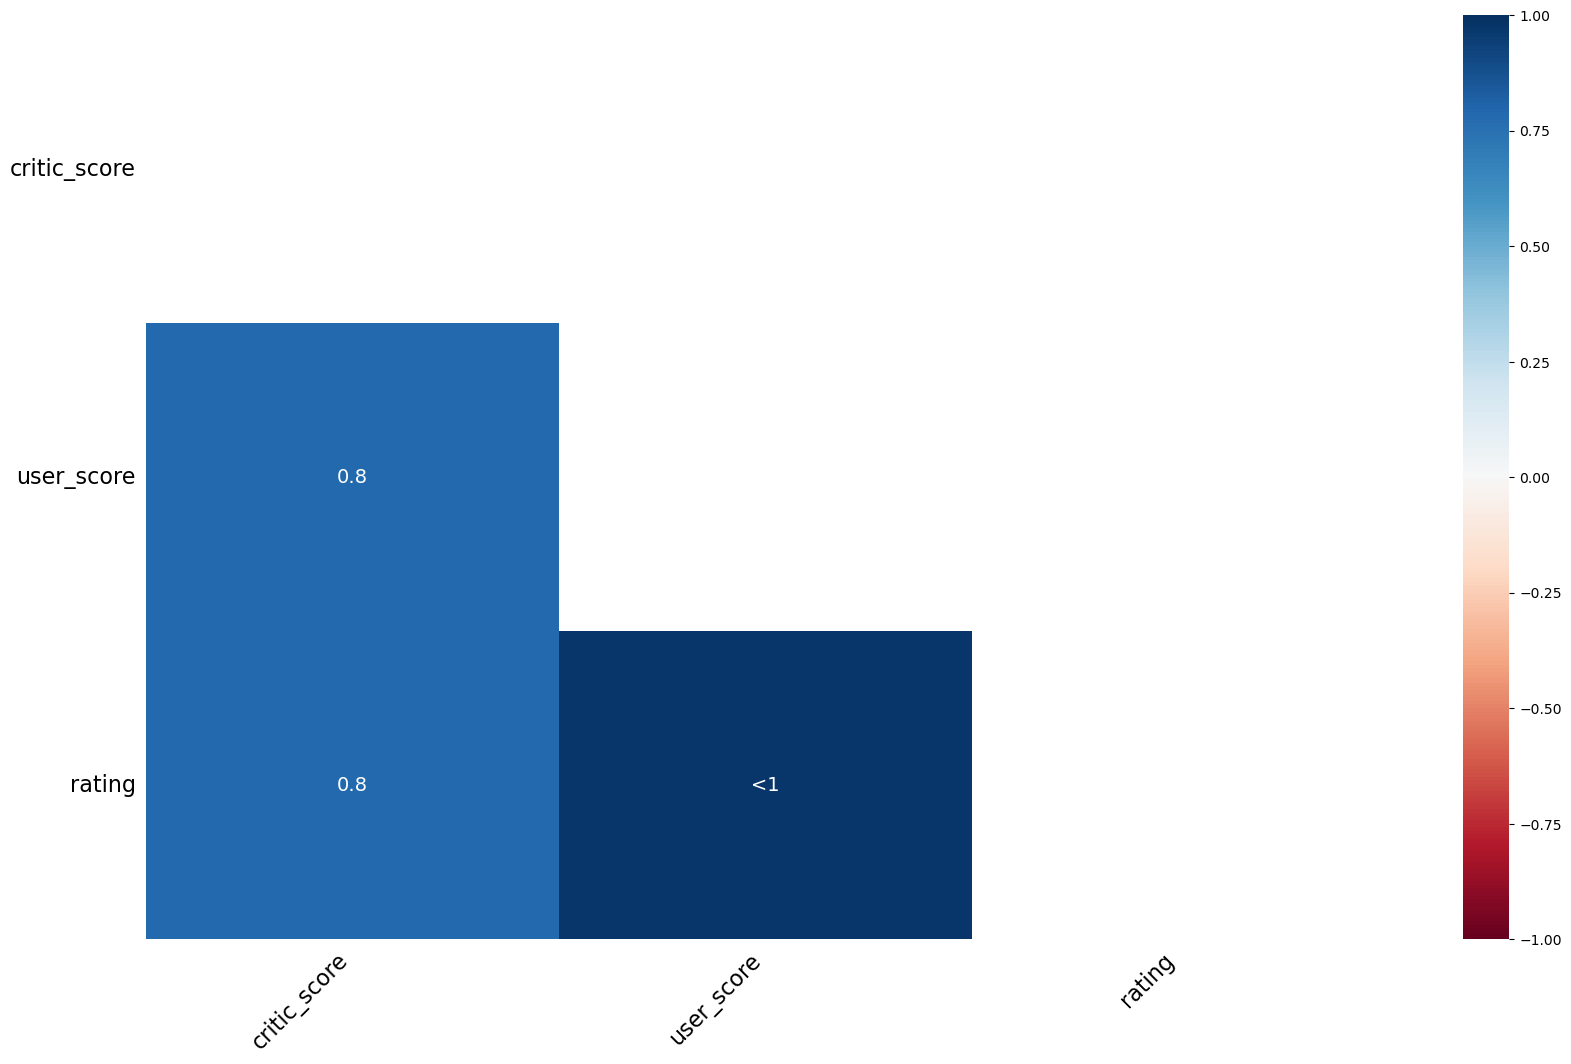

In [24]:
# вывел heatmap из библиотеки missingno для понимания логики пропусков
# в столбцацх с оценками (рейтингом)
msno.heatmap(df);

Заметим, что одновременное отсутствие значений в столбцах с оценками наблюдается, как минимум, у 70% пропущенных наблюдений. Эти значения также можно заполнить, но в рамках данного проекта это неуместно.

In [25]:
df['rating'] = df['rating'].fillna('no rating')

In [26]:
# избавился от артефакта 'tbd'
df['user_score'] = df['user_score'].replace('tbd', np.nan)

**Выводы**

Были обработаны пропуски в:
- `name`: там одна и та же игра без названия дважды записалась в датасет. Восстановить невозможно, удалил. Возможная причина пропусков: техническая ошибка
- `year_of_release`: 269 пропусков годов выпуска были заполнены настоящими значениями. Возможная причина пропусков: отсутствие данных в исходной карточке игры, откуда собирались данные
- `critic_score, user_score`: пропущены 40-50 % данных, восстановить невозможно, удалить строки в таком количестве нельзя. Возможная причина пропусков: у некоторых игр просто нет оценок пользователей в том источнике, откуда брались данные, или оценок слишком мало, чтобы из них выводить общую оценку
- `rating`: пропущенные данные заменил на 'no rating', потому что в анализе это пригодится. Возможная причина пропусков: рейтинг выдаёт американское агентство, многие игры до него до ходят, в них не играют в Северной Америке, например

Аббревиатура `tbd` означает 'to be decided' и используется, когда нет точной информации о каком-то явлении или событии, но такая информация должна быть уточнена.

#### Изменение типов данных

Заменим тип данных столбца `'year_of_release'` на `int`, потому что года являются целочисленными значениями.
Заменим тип данных столбцов `'genre', 'rating'` на `category`, потому что это категориальные переменные. `'platform'` останется текстовой переменной, чтобы нормально восприниматься методами для построения графиков. 

In [27]:
# изменил тип данных переменных

df = df.astype({'year_of_release': 'int',
                'user_score': 'float',
                'genre': 'category',
                'rating': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16711 entries, 0 to 16710
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16711 non-null  object  
 1   platform         16711 non-null  object  
 2   year_of_release  16711 non-null  int64   
 3   genre            16711 non-null  category
 4   na_sales         16711 non-null  float64 
 5   eu_sales         16711 non-null  float64 
 6   jp_sales         16711 non-null  float64 
 7   other_sales      16711 non-null  float64 
 8   critic_score     8136 non-null   float64 
 9   user_score       7589 non-null   float64 
 10  rating           16711 non-null  category
dtypes: category(2), float64(6), int64(1), object(2)
memory usage: 1.2+ MB


#### Добавление расчётного столбца

In [28]:
# посчитал суммарные продажи во всех регионах и записал их в отдельный столбец.
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(df.shape)
df.head()

(16711, 12)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


**Выводы**

В процессе подготовки данных к анализу были проделаны следующие манипуляции:
1. Скорректированы названия столбцов
2. Подтверждено отсутствие дубликатов в данных
3. Заполнены пропуски в столбце `year_of_release`
4. Оставлены пропуски в остальных столбцах
5. Добавлен расчётный столбец с общей суммой продаж

### Исследовательский анализ данных

In [29]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16711.000000,16711.000000,16711.000000,16711.000000,16711.000000,8136.000000,7589.000000,16711.00000
mean,2006.465921,0.263324,0.145061,0.077617,0.047348,68.968166,7.125194,0.53335
std,5.912672,0.813611,0.503387,0.308885,0.186752,13.938952,1.500049,1.54837
min,1977.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.00000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.06000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.17000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.47000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.54000


In [30]:
display(df.query('na_sales > 41'))
display(df.query('eu_sales > 28'))
display(df.query('jp_sales > 10'))
display(df.query('other_sales > 10'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,no rating,31.38


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.4,0.41,10.57,95.0,9.0,M,20.81


 - Количество игр до 2007 года (медиана) равно количество игры после 2007 года: то есть за 10 последних лет было произведено столько же игр, сколько за 30 лет до этого.
 - Самая популярная игра в Северной Америке и Европе продалась в количестве 41,36 и 28,96 млн копий соответственно — это игра "Wii Sports" для платформы Wii (2006 год). В Японии самой популярной игрой стала игра "Pokemon Red/Pokemon Blue" для платформы Game Boy (1996 год), продавшаяся в количестве 10,22 млн копий. На других рынках, самой популярной игрой стала Grand Theft Auto: San Andreas для Sony Play Station 2 (2004) с 10,57 млн копий.

#### Количество выпущенных игр по годам

In [31]:
# создал датафрейм без дубликатов названий игр
df_wo_name_dupl = df.drop_duplicates(subset=['name'])

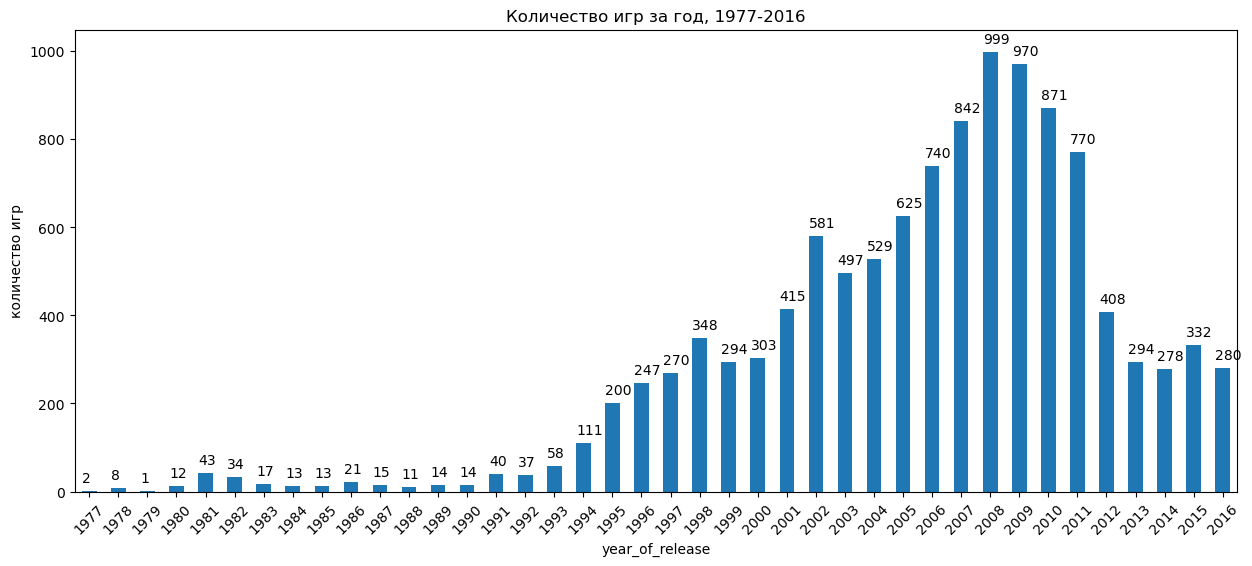

In [32]:
ax = (df_wo_name_dupl['year_of_release']
      .value_counts()
      .sort_index()
      .plot(kind='bar',
            figsize=(15, 6)));

# добавил лейблы
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height() + 20))
    
plt.xlabel('year_of_release')
plt.ylabel('количество игр')
plt.xticks(rotation=45)

plt.title('Количество игр за год, 1977-2016')
plt.show()

До 1990 года количество выпущенных в год игр было примерно одинаковым, поэтому при желании можно рассмотреть срез с 1990 года отдельно:

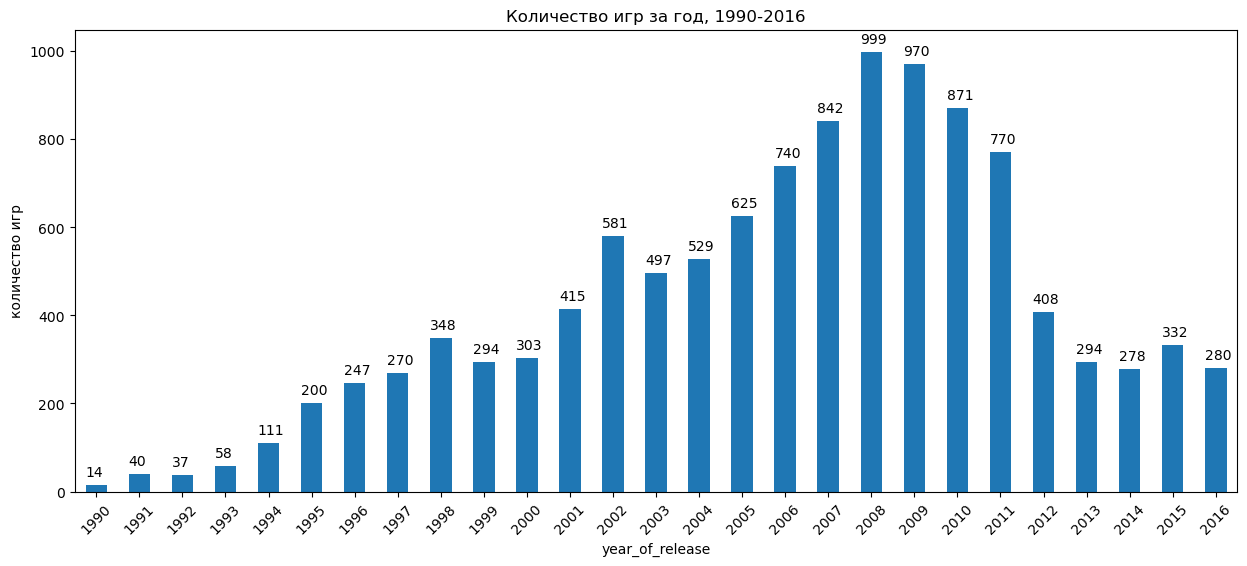

In [33]:
df_after_1990 = df_wo_name_dupl[df_wo_name_dupl['year_of_release'] >= 1990]

ax = (df_after_1990['year_of_release']
      .value_counts()
      .sort_index()
      .plot(kind='bar',
            figsize=(15, 6)));

# добавим лейблы
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height() + 20))
    
plt.xlabel('year_of_release')
plt.ylabel('количество игр')
plt.xticks(rotation=45)

plt.title('Количество игр за год, 1990-2016')
plt.show()

**Выводы**

Рост количества выпускаемых игр начался в 1990 году. В 1990-х стали появляться игровые платформы (Super Nintendo, Sega Genesis, Game Boy) и распространились персональные компьютеры от Microsoft, Apple.

В 2008 году был пик количества выпущенных игр — 999. Далее наступил экономический кризис, и возможно инвестиций на разработку не хватало, поэтому количество релизов начало снижаться. Также для выпуска конкурентоспособных игр была необходима компетенция в графике, которая только массово развивалась. Многие игры стали переходить в КПК, телефоны. В 2016 году было выпущено в 3 раза меньше игр, чем в 2008.

#### Распределение проданных игр по игровым платформам

In [34]:
# исправил ошибку в данных после замечания
display(df[df['name'] == 'Strongest Tokyo University Shogi DS']['year_of_release'])
df.loc[df['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2007
display(df[df['name'] == 'Strongest Tokyo University Shogi DS']['year_of_release'])

15954    1985
Name: year_of_release, dtype: int64

15954    2007
Name: year_of_release, dtype: int64

In [35]:
# создал переменную с 10 платформами, на которых было продано больше всего игр за всё время наблюдений
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       805.65
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

In [36]:
# сгруппировал продажи по годам для выбранных платформ
platform_sales_by_year = (df[df['platform'].isin(top_platforms.index)]
                          .groupby(['platform', 'year_of_release'])[['total_sales']].sum())

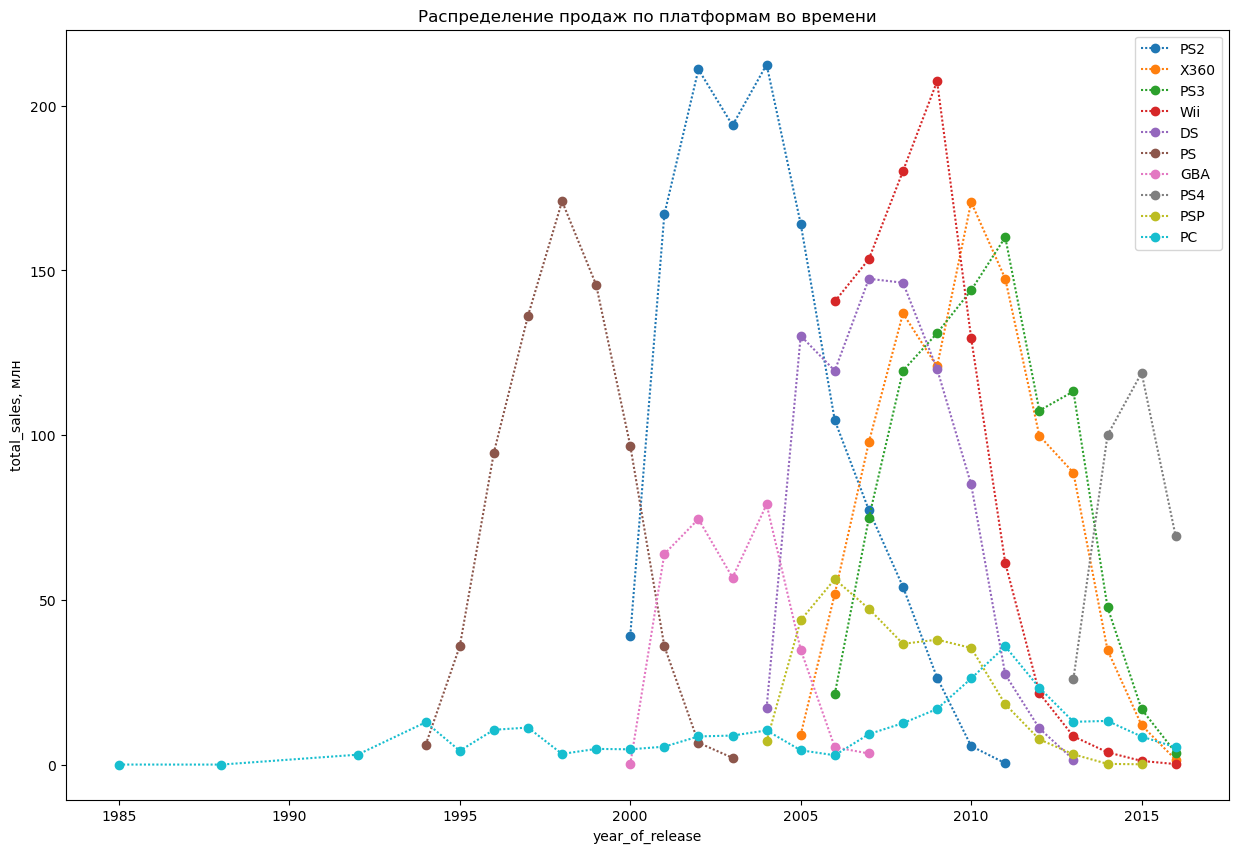

In [37]:
# построил диаграмму распределения продаж по платформам во времени

fig, ax = plt.subplots(figsize=(15, 10))

for platform in top_platforms.index:
    sales = platform_sales_by_year.loc[platform]
    ax.plot(sales.index,
            sales['total_sales'],
            label=platform,
            linestyle='dashed',
            dashes=(1, 1),
            marker='o')

ax.set_xlabel('year_of_release')
ax.set_ylabel('total_sales, млн')
ax.set_title('Распределение продаж по платформам во времени')
ax.legend()
plt.show()

**Вывод**

Жизненный цикл игровых платформ (отсчёт начинается с ненулевых продаж игр для данной платформы):
1. `PS2`: 12 лет (1999-2011, пик в 2002-2004)
2. `X360`: 12 лет и более (2004-2016 и далее, пик в 2010)
3. `PS3`: 11 лет и более (2005-2016 и далее, пик в 2011)
4. `Wii`: 10 лет (2005-2015, пик в 2009)
5. `DS`: 11 лет (2003-2014, пик в 2007)
6. `PS`: 12 лет (1992-2004, пик в 1998)
7. `GBA`: 8 лет (2000-2008, пик в 2004)
8. `PS4`: 4 года и более (2012-2016 и далее, пик в 2015)
9. `PSP`: 11 лет (2003-2014, пик в 2006)
10. `PC`: 24 года и более (1992-2016 и далее, пик в 2011)

Заметно, что игровые платформы живут 10-12 лет.

**Актуальным периодом для дальнейшего анализа я выбрал период с 2012 года.** Основной фактор — эти данные помогут построить прогноз на 2017 год. Начиная с 2012 года объём продаж игр резко упал, и появился новый тренд — умеренное снижение продаж. Выбор данного периода поможет избежать завышенной линии тренда.

In [38]:
# перезаписал датафрейм
df_2012 = df.query("year_of_release >= 2012")
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2900 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             2900 non-null   object  
 1   platform         2900 non-null   object  
 2   year_of_release  2900 non-null   int64   
 3   genre            2900 non-null   category
 4   na_sales         2900 non-null   float64 
 5   eu_sales         2900 non-null   float64 
 6   jp_sales         2900 non-null   float64 
 7   other_sales      2900 non-null   float64 
 8   critic_score     1321 non-null   float64 
 9   user_score       1542 non-null   float64 
 10  rating           2900 non-null   category
 11  total_sales      2900 non-null   float64 
dtypes: category(2), float64(7), int64(1), object(2)
memory usage: 255.6+ KB


#### Платформы — лидеры по продажам игр

Ещё раз выведем линейный график для нового датафрейма.

In [39]:
# создал переменную для вывода платформ с ненулевыми продажами
top_platforms = df_2012.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms

platform
PS4     314.14
PS3     288.88
X360    236.65
3DS     194.62
XOne    159.32
WiiU     82.19
PC       63.45
PSV      49.44
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

In [40]:
# сгруппировал продажи по годам для выбранных платформ
platform_sales_by_year = (df_2012[df_2012['platform'].isin(top_platforms.index)]
                          .groupby(['platform', 'year_of_release'])[['total_sales']]
                          .sum())

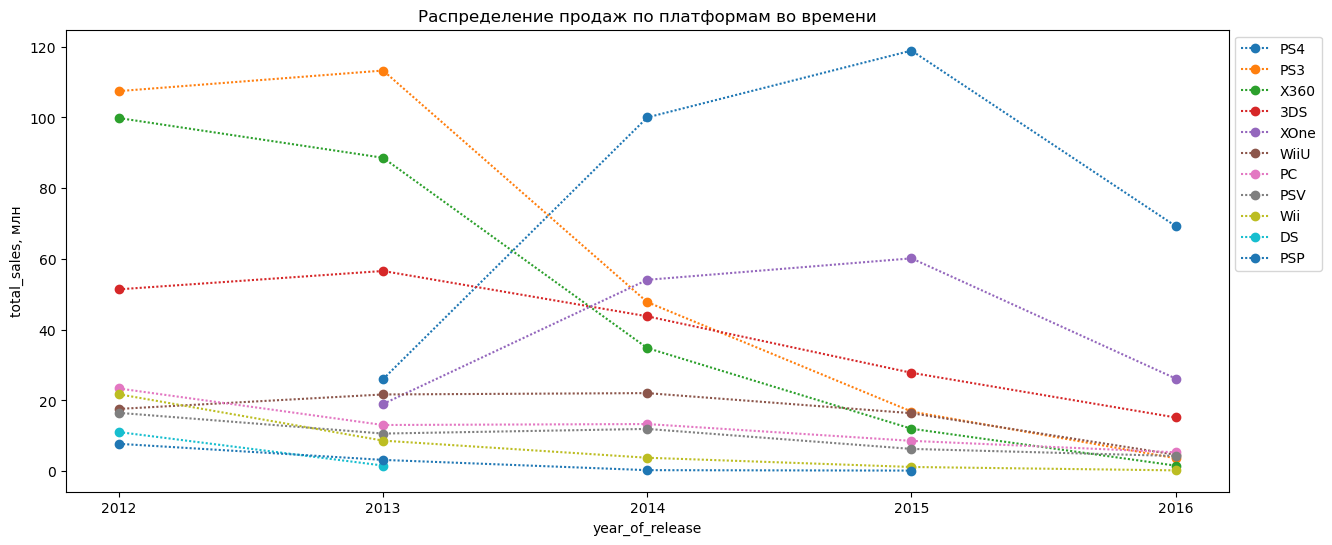

In [41]:
# построил диаграмму распределения продаж по платформам во времени

fig, ax = plt.subplots(figsize=(15, 6))

for platform in top_platforms.index:
    sales = platform_sales_by_year.loc[platform]
    ax.plot(sales.index,
            sales['total_sales'],
            label=platform,
            linestyle='dashed',
            dashes=(1, 1),
            marker='o')

ax.set_xlabel('year_of_release')
ax.set_ylabel('total_sales, млн')
ax.set_title('Распределение продаж по платформам во времени')
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(range(int(min(ax.get_xlim())) + 1, int(max(ax.get_xlim())) + 1))
plt.show()

**Выводы**

У всех компаний продажи падают. Дольше остальных прибыль будут приность игры на PS4.

#### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

(0.0, 2.0)

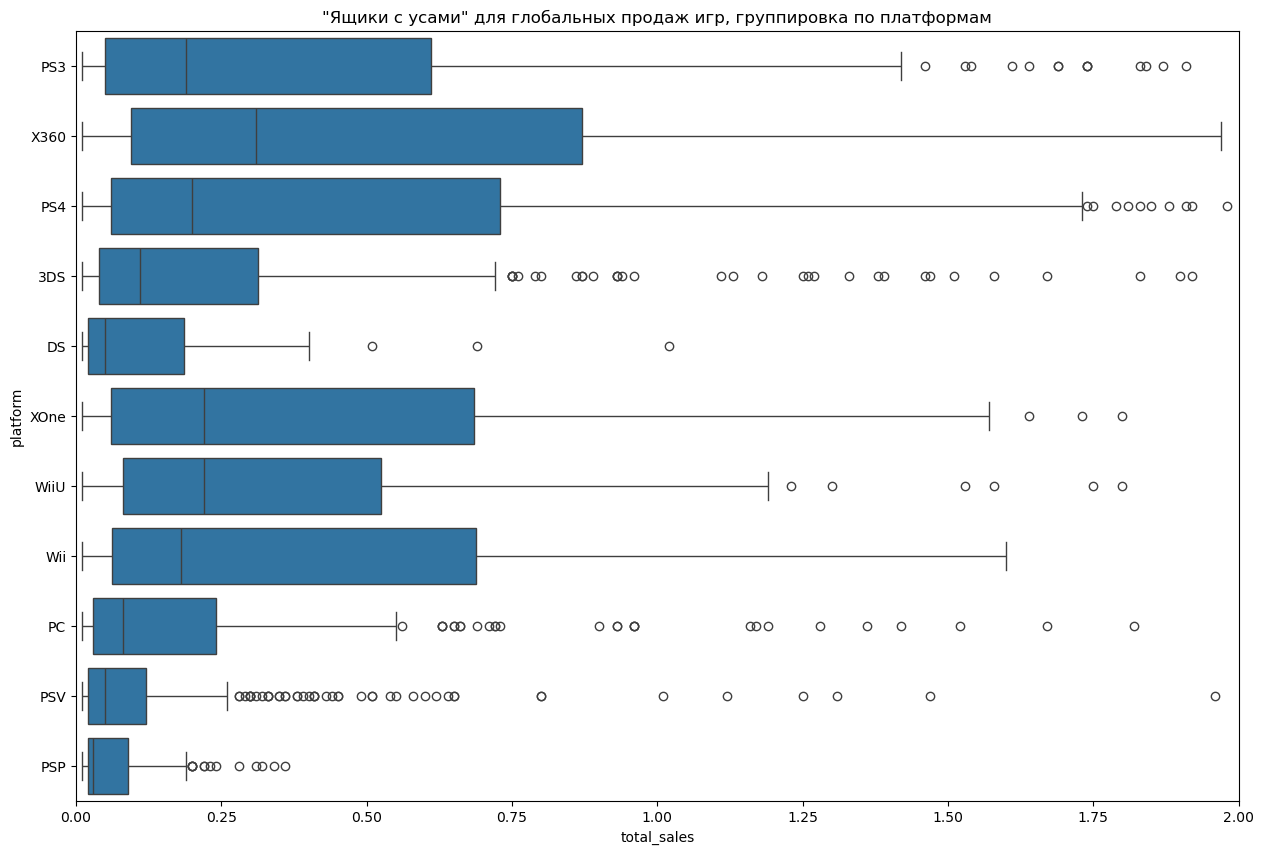

In [42]:
plt.figure(figsize=(15, 10))
(sns.boxplot(data=df_2012,
            x='total_sales',
            y='platform',
            orient='h')
 .set_title('"Ящики с усами" для глобальных продаж игр, группировка по платформам'));
plt.xlim(0, 2)

In [43]:
df_2012[df_2012['platform'] == 'PS3']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
...,...,...,...,...,...,...,...,...,...,...,...,...
16624,Akatsuki no Goei Trinity,PS3,2012,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16634,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16670,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,no rating,0.01
16687,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01


**Выводы**

Независимо от платформы, 99 % игр не продавалась более чем в 2 млн копий. 1 % — на диаграмме это выбросы. Самой популярной игрой стала Grand Theft Auto V на PS3.

Самой успешной платформой можно назвать Xbox 360, потому что у этой платформы самая большая медиана, самый широкий межквартильный размах, самая длинный верхний (правый) ус — это говорит о том, что в среднем игра на этой платформе будет чуть правее на графике, т. е. число проданных копий в среднем для игр будет чуть выше.

Самой неуспешной платформой можно назвать PSP. Самая продаваемая игра здесь не превышает 400 тысяч копий.

#### Корреляция между продажами игр и отзывами на них

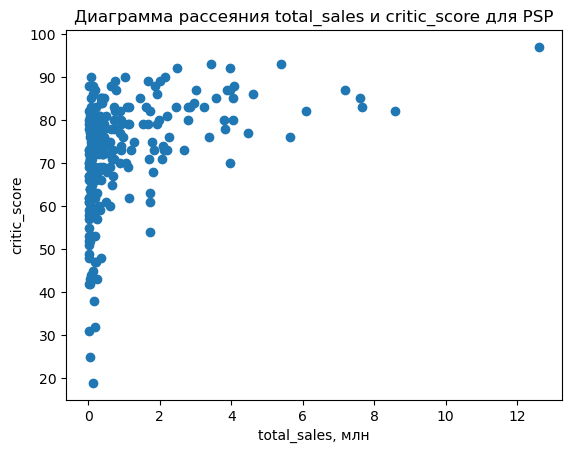

Коэффициент корреляции между total_sales и critic_score (platform = PSP): 0.4065679020617816


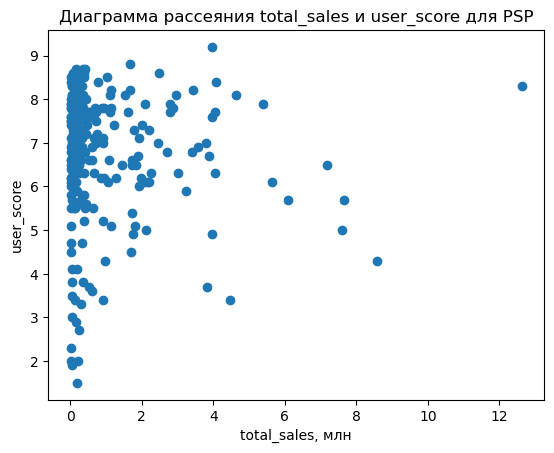

Коэффициент корреляции между total_sales и user_score (platform = PSP): -0.03195711020455643


In [44]:
# создал список переменных, для которых нужно построить диаграммы рассеяния
variables = ['critic_score', 'user_score']

# отфильтровал данные для выбора самой популярной платформы
filtered_df = df_2012[df_2012['platform'] == 'PS4']

# построил диаграмму рассеяния для связи между 'total_sales' и ['critic_score', 'user_score']
for var in variables:
    plt.scatter(filtered_df['total_sales'], filtered_df[var])
    plt.xlabel('total_sales, млн')
    plt.ylabel(var)
    plt.title(f"Диаграмма рассеяния total_sales и {var} для {platform}")
    plt.show()

    # вывел коэффициент корреляции между 'total_sales' и ['critic_score', 'user_score']
    corr = filtered_df['total_sales'].corr(filtered_df[var])
    print(f"Коэффициент корреляции между total_sales и {var} (platform = {platform}): {corr}")

Связь между продажами и оценкой критиков и пользователей — слабая. Более, того она разнонаправленная: corr=0.4 и corr=-0.3. Следовательно, логически связать эти показатели невозможно.

Выведем ниже общую корреляционную матрицу по всему датасету. Видно, что единственное за что можно зацепиться в анализе — корреляция 0.5 между `'user_score', 'critic_score'`, чего явно не достаточно для построения логических связей.

In [45]:
df_2012[['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.004522,0.307624
user_score,0.004522,1.000000,0.519887
critic_score,0.307624,0.519887,1.000000


Теперь посмотрим на корреляцию и диаграммы рассеяния для всех платформ.

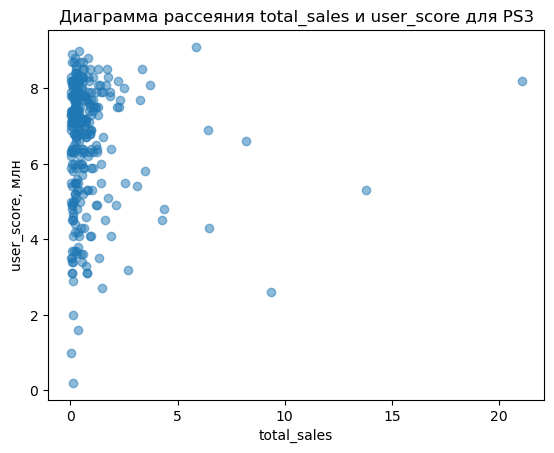

Коэффициент корреляции между total_sales и user_score для PS3: -0.007349770037870654


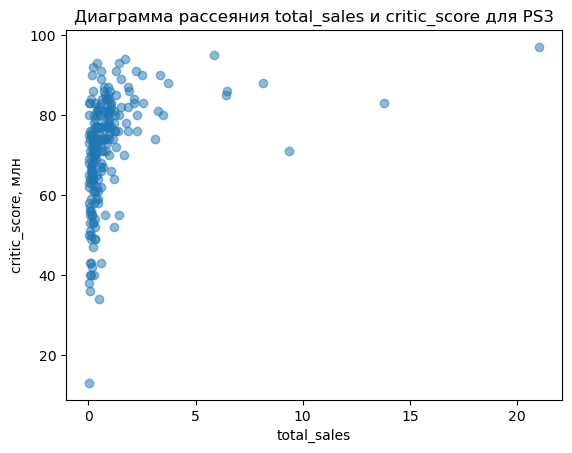

Коэффициент корреляции между total_sales и critic_score для PS3: 0.33149725926295887


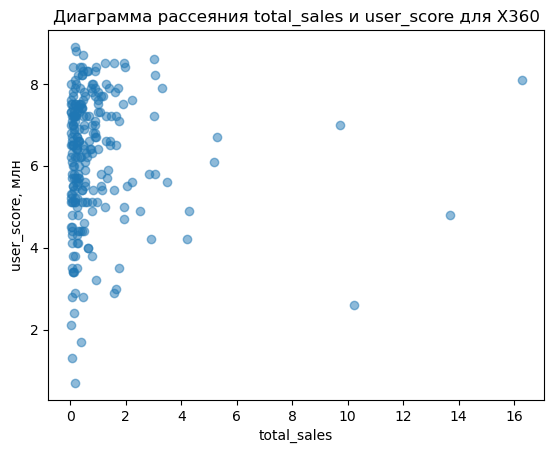

Коэффициент корреляции между total_sales и user_score для X360: 0.009599122679085446


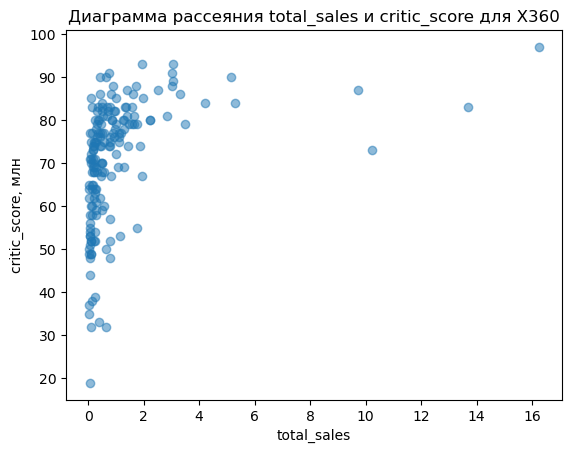

Коэффициент корреляции между total_sales и critic_score для X360: 0.3621342878061681


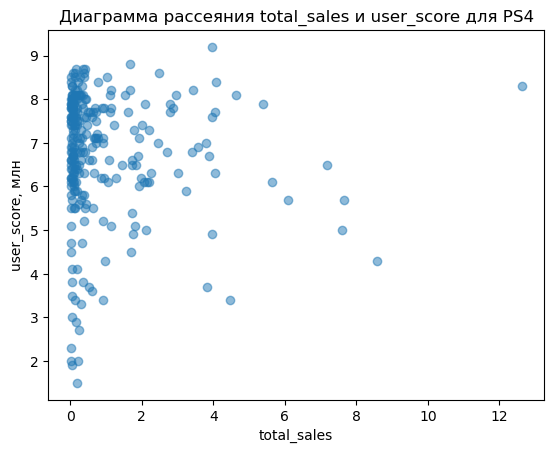

Коэффициент корреляции между total_sales и user_score для PS4: -0.03195711020455643


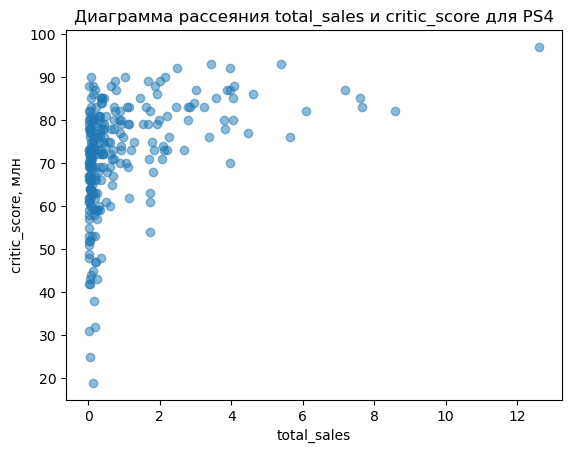

Коэффициент корреляции между total_sales и critic_score для PS4: 0.4065679020617816


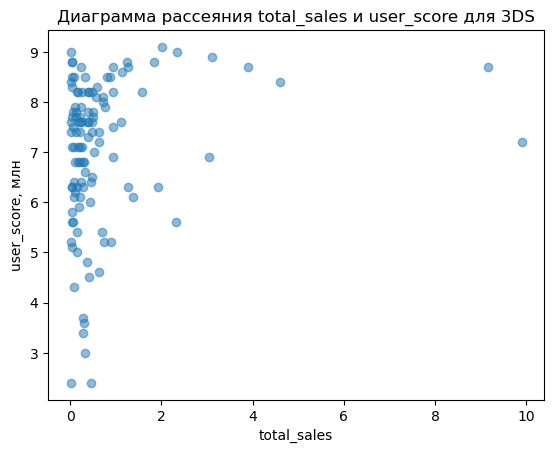

Коэффициент корреляции между total_sales и user_score для 3DS: 0.19758263411038596


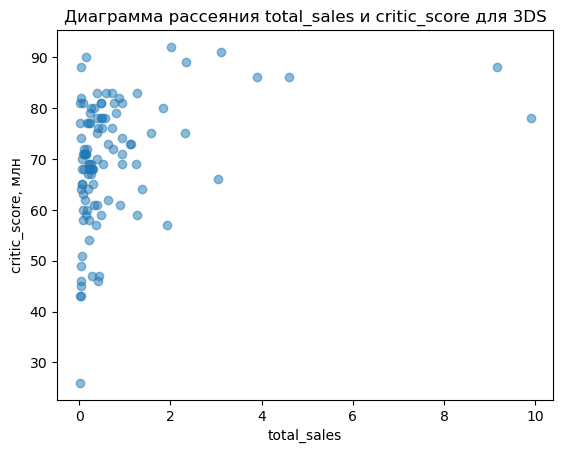

Коэффициент корреляции между total_sales и critic_score для 3DS: 0.32080286953607845


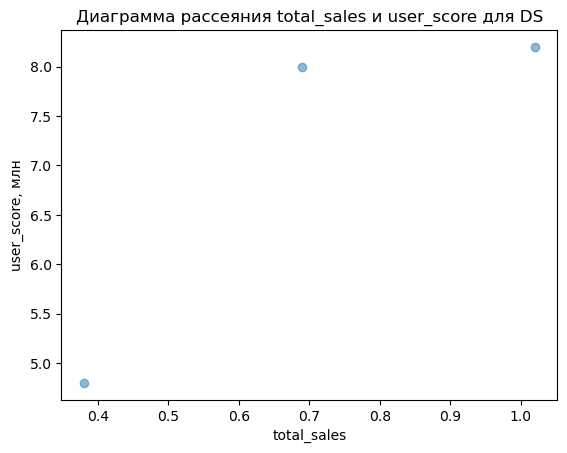

Коэффициент корреляции между total_sales и user_score для DS: 0.88270872757644


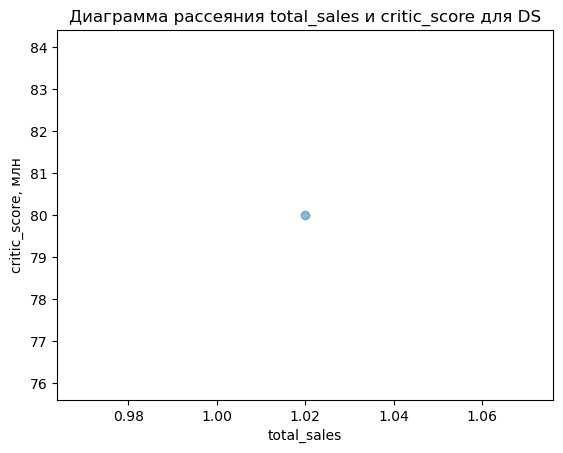

Коэффициент корреляции между total_sales и critic_score для DS: nan


/opt/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


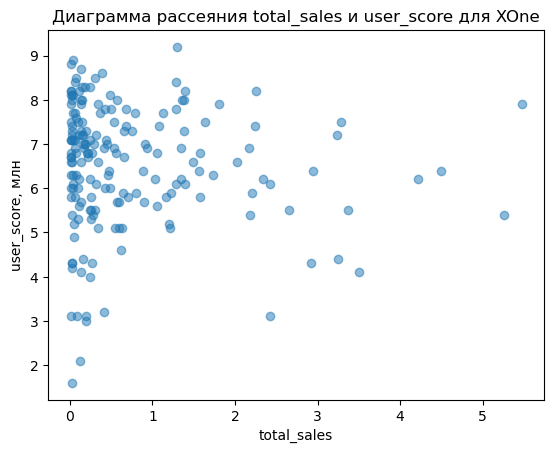

Коэффициент корреляции между total_sales и user_score для XOne: -0.06892505328279415


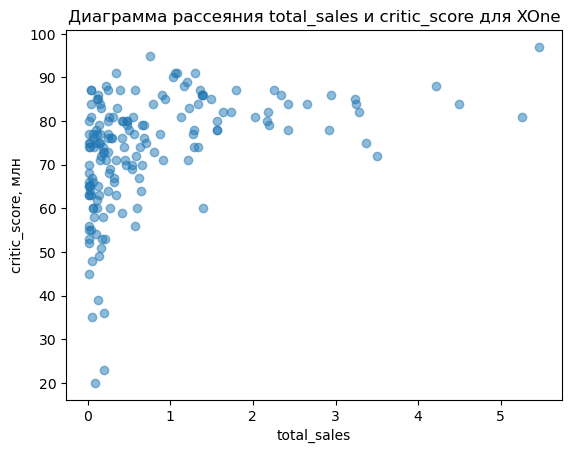

Коэффициент корреляции между total_sales и critic_score для XOne: 0.41699832800840164


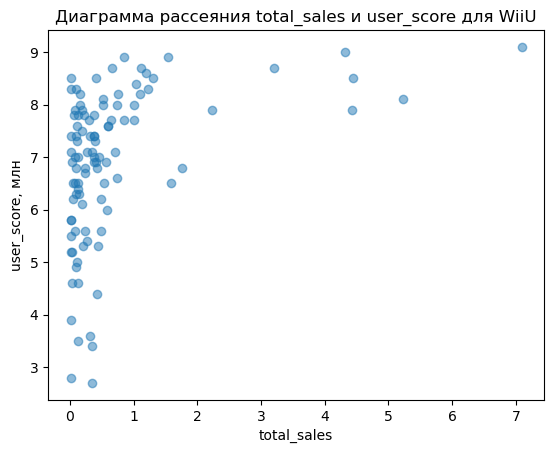

Коэффициент корреляции между total_sales и user_score для WiiU: 0.4002190202148617


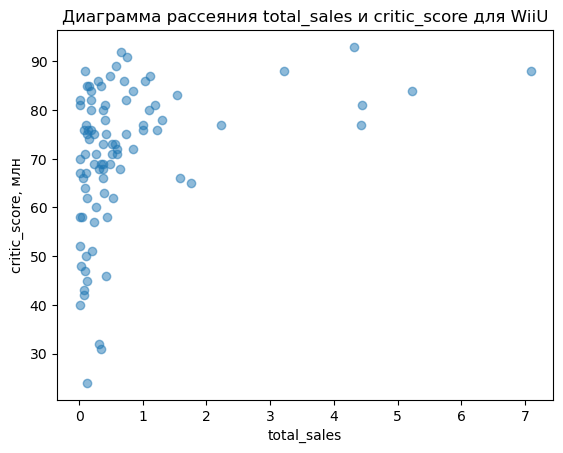

Коэффициент корреляции между total_sales и critic_score для WiiU: 0.3483797601201749


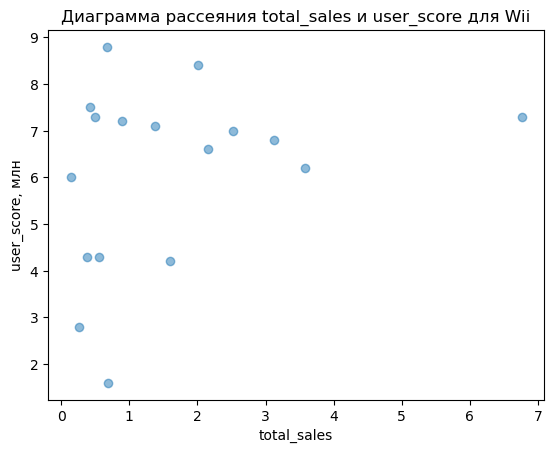

Коэффициент корреляции между total_sales и user_score для Wii: 0.2961968000747953


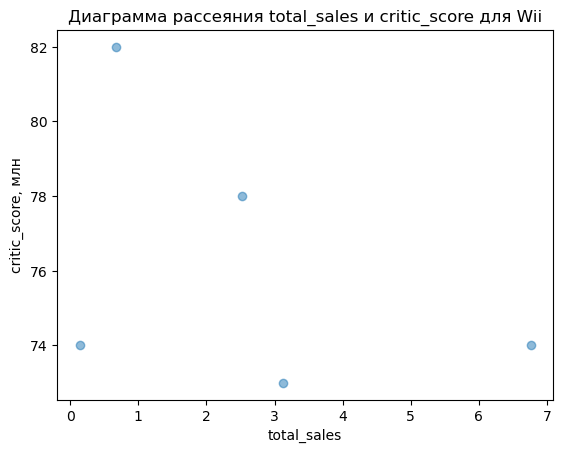

Коэффициент корреляции между total_sales и critic_score для Wii: -0.4243413011077495


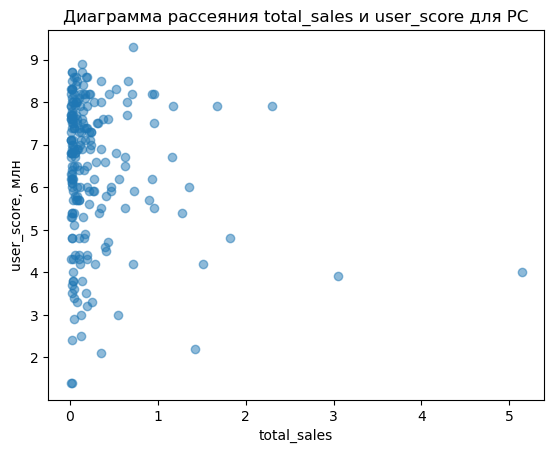

Коэффициент корреляции между total_sales и user_score для PC: -0.11932962390448283


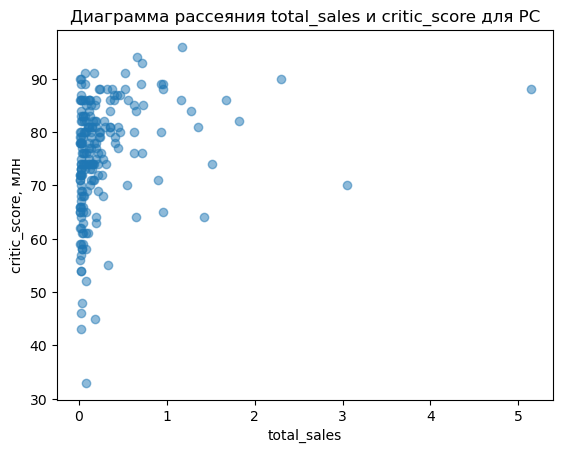

Коэффициент корреляции между total_sales и critic_score для PC: 0.23925821983896894


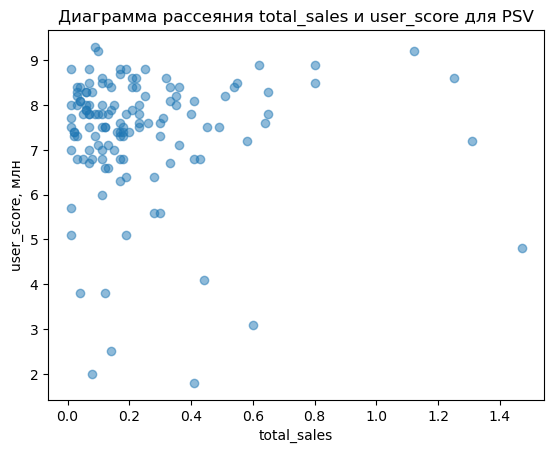

Коэффициент корреляции между total_sales и user_score для PSV: -0.004229953914709043


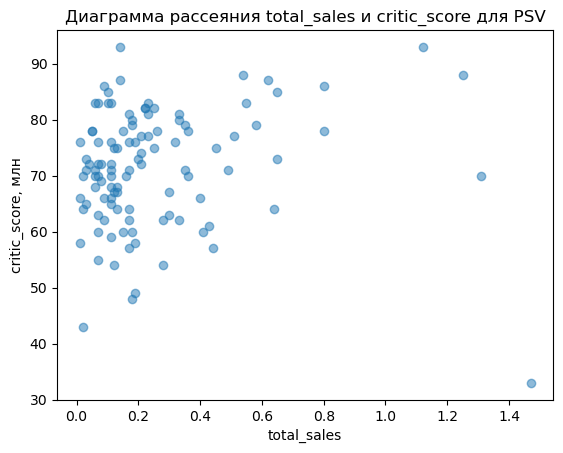

Коэффициент корреляции между total_sales и critic_score для PSV: 0.09446607248243677


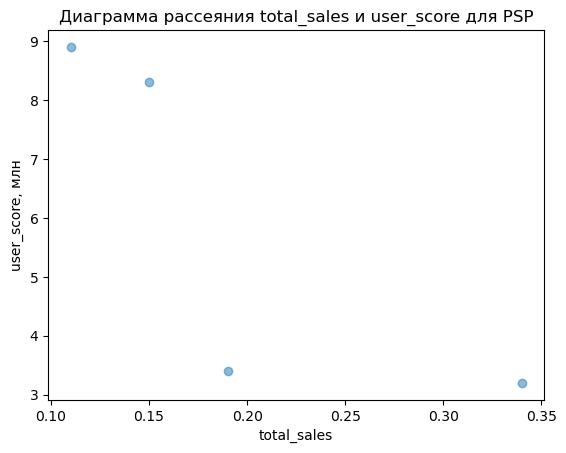

Коэффициент корреляции между total_sales и user_score для PSP: -0.802302061939321


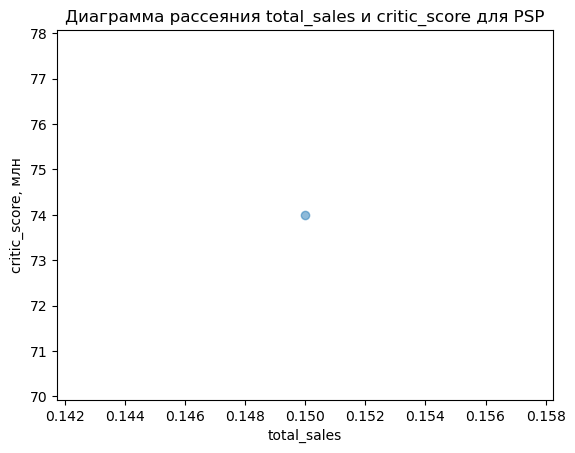

Коэффициент корреляции между total_sales и critic_score для PSP: nan


In [46]:
# создал список уникальных значений в 'platform'
unique_platforms = df_2012['platform'].unique()

# создал список пар для нахождения взаимосвязи
column_pairs = [('total_sales', 'user_score'), ('total_sales', 'critic_score')]

# создал цикл для перебора элементов списка 'unique_platforms'
for platform in unique_platforms:
    platform_df = df_2012[df_2012['platform'] == platform]
    
    # создал цикл для перебора пар из списка пар для построения диаграммы рассеяния и вывод коэффициента корреляции
    for x_col, y_col in column_pairs:
        plt.scatter(platform_df[x_col], platform_df[y_col], alpha=0.5)
        plt.xlabel(x_col)
        plt.ylabel(y_col + ', млн')
        plt.title(f'Диаграмма рассеяния {x_col} и {y_col} для {platform}')
        plt.show()
        
        # вывел коэффициент корреляции
        corr = platform_df[x_col].corr(platform_df[y_col])
        print(f"Коэффициент корреляции между {x_col} и {y_col} для {platform}: {corr}")

**Выводы**

Подтвердилось отсутствие хотя бы средней силы связи >|0.5| между переменными с достаточным количеством наблюдений.

#### Общее распределение игр по жанрам

In [47]:
genre_profit = (df_2012.groupby('genre')
                .agg(count=('name', 'count'),
                     count_percentage=('name', lambda x: (len(x) / len(df_2012) * 100)),
                     total_sales=('total_sales', 'sum'),
                     sales_percentage=('total_sales', lambda x: (x.sum() / df_2012['total_sales'].sum() * 100)))
                .reset_index()
                .sort_values('total_sales', ascending=False))

genre_profit['count_percentage'] = genre_profit['count_percentage'].round(1)
genre_profit['sales_percentage'] = genre_profit['sales_percentage'].round(1)
genre_profit['sales_count_ratio'] = (genre_profit['sales_percentage']
                                     / genre_profit['count_percentage']).round(1)

genre_profit

/var/folders/hj/fqskmm_j7yl8t2b6z10ntj2c0000gn/T/ipykernel_12163/516168337.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_profit = (df_2012.groupby('genre')


,genre,count,count_percentage,total_sales,sales_percentage,sales_count_ratio
0,Action,1033,35.6,441.74,30.5,0.9
8,Shooter,238,8.2,304.78,21.1,2.6
7,Role-Playing,372,12.8,193.07,13.3,1.0
10,Sports,269,9.3,181.09,12.5,1.3
3,Misc,193,6.7,85.15,5.9,0.9
4,Platform,85,2.9,61.00,4.2,1.4
6,Racing,115,4.0,53.50,3.7,0.9
2,Fighting,109,3.8,44.49,3.1,0.8
9,Simulation,82,2.8,35.26,2.4,0.9
1,Adventure,303,10.4,29.44,2.0,0.2


**Выводы**

*(справочно: если коэффициент окупаемости `sales_count_ratio` равен 1, то доля выпущенных игр равна доле проданных копий; если коэффициент больше 1, то меньшее количество игр заняло большую часть рынка)*

- 30-35 % игр по количеству релизов и по количеству проданных копий занимают игры жанра `Action`
- 51 % проданных копий занимают всего два жанра: `Action, Shooter`
- 67 % проданных копий занимают всего 4 жанра:`Action, Shooter, Role-Playing, Sports`
- самым прибыльным жанром можно считать шутеры: коэффициент окупаемости равен 2.6
- самыми неприбыльными жанрами являются `Adventure, Strategy, Puzzle`

### Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

**Самые популярные платформы (топ-5)**

,platform,na_sales,region_share
0,X360,140.12,0.24
1,PS4,108.74,0.18
2,PS3,103.45,0.17
3,XOne,93.12,0.16
4,3DS,55.31,0.09


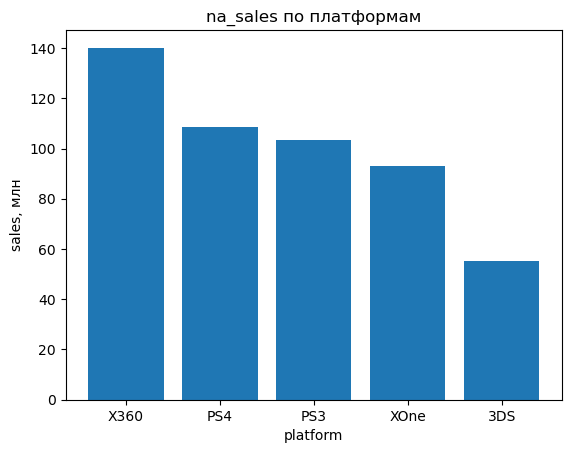

,platform,eu_sales,region_share
0,PS4,141.09,0.28
1,PS3,106.86,0.21
2,X360,74.55,0.15
3,XOne,51.59,0.10
4,3DS,42.63,0.08


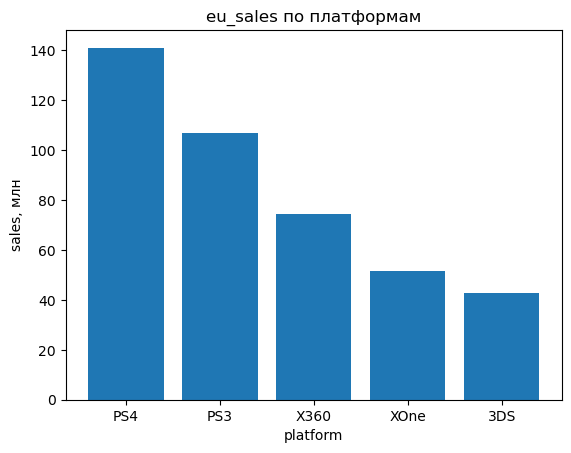

,platform,jp_sales,region_share
0,3DS,87.81,0.46
1,PS3,35.30,0.18
2,PSV,21.11,0.11
3,PS4,15.96,0.08
4,WiiU,13.01,0.07


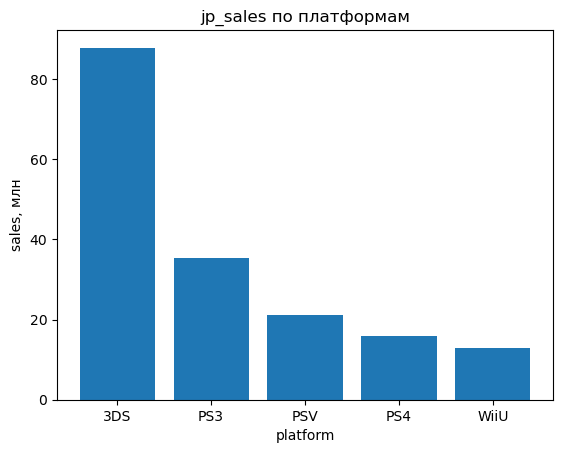

In [48]:
columns = ['na_sales', 'eu_sales', 'jp_sales']

for column in columns:
    total_sales_region = df_2012[column].sum()  # общие продажи в регионе
    top_platforms = df_2012.groupby('platform')[column].sum().nlargest(5).reset_index()
    top_platforms['region_share'] = (top_platforms[column] / total_sales_region).round(2)
    
    display(top_platforms[['platform', column, 'region_share']])
    
    plt.figure()
    plt.bar(top_platforms['platform'], top_platforms[column])
    plt.title(f'{column} по платформам')
    plt.xlabel('platform')
    plt.ylabel('sales, млн')
    plt.show()

**Выводы**

В Северной Америке самая популярна платформа — Xbox 360 от Microsoft (24 %), в Европе — Sony Play Station 4 от японской компании Sony (28 %), а в самой Японии 46% рынка с 2012 года заняла Nintendo 3DS от отечественной компании Nintendo.

Мировые лидеры и антогонисты — PS4 и Xbox360 — имеют разную популярность на разных рынках:
- В Северной Америке на них приходится 42 % рынка
- В Европе на них приходится 49 % рынка
- В Японии на них приходится 9 % рынка (отдельно посмотрел топ-N платформ)

**Самые популярные жанры (топ-5)**

/var/folders/hj/fqskmm_j7yl8t2b6z10ntj2c0000gn/T/ipykernel_12163/797216997.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres = df_2012.groupby('genre')[column].sum().nlargest(5).reset_index()


,genre,na_sales,region_share
0,Action,177.92,0.30
1,Shooter,144.79,0.24
2,Sports,81.53,0.14
3,Role-Playing,64.11,0.11
4,Misc,38.25,0.06


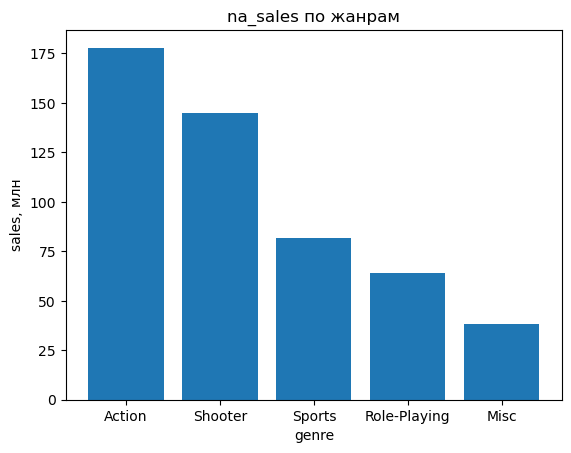

/var/folders/hj/fqskmm_j7yl8t2b6z10ntj2c0000gn/T/ipykernel_12163/797216997.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres = df_2012.groupby('genre')[column].sum().nlargest(5).reset_index()


,genre,eu_sales,region_share
0,Action,159.81,0.31
1,Shooter,113.50,0.22
2,Sports,69.09,0.14
3,Role-Playing,48.58,0.10
4,Racing,27.29,0.05


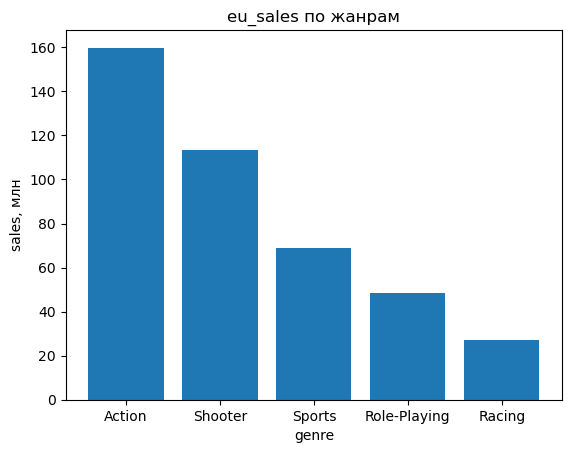

/var/folders/hj/fqskmm_j7yl8t2b6z10ntj2c0000gn/T/ipykernel_12163/797216997.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres = df_2012.groupby('genre')[column].sum().nlargest(5).reset_index()


,genre,jp_sales,region_share
0,Role-Playing,65.52,0.34
1,Action,52.80,0.27
2,Misc,12.86,0.07
3,Simulation,10.41,0.05
4,Fighting,9.44,0.05


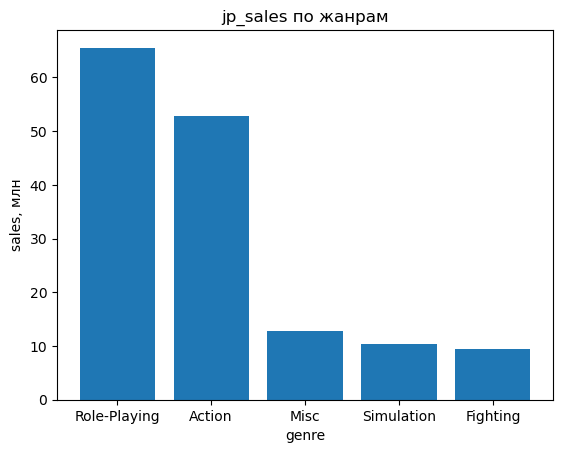

In [49]:
columns = ['na_sales', 'eu_sales', 'jp_sales']

for column in columns:
    total_sales_region = df_2012[column].sum()  # общие продажи в регионе
    top_genres = df_2012.groupby('genre')[column].sum().nlargest(5).reset_index()
    top_genres['region_share'] = (top_genres[column] / total_sales_region).round(2)
    
    display(top_genres[['genre', column, 'region_share']])
    
    plt.figure()
    plt.bar(top_genres['genre'], top_genres[column])
    plt.title(f'{column} по жанрам')
    plt.xlabel('genre')
    plt.ylabel('sales, млн')
    plt.show()

**Выводы**

- В Японии не играют в шутеры и спортивные игры. Зато симуляторы и игры, не попадающие ни в один укрупнённый жанр, занимают 12 % рынка, тогда как в остальных регионах — 7-8 %.
- Жанр RPG является самым популярным в Японии (34 %), а в Европе и Северной Америке занимает только 10 % продаж.
- По первым 4 позициям предпочтения игроков в Северной Америке и Европе одинаковы

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

*Cправочно: E (Everyone), E10+ (Everyone 10+), T (Teen), M (Mature 17+)*

/var/folders/hj/fqskmm_j7yl8t2b6z10ntj2c0000gn/T/ipykernel_12163/682920882.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_rating = df_2012.groupby('rating')[column].sum().reset_index().sort_values(column, ascending=False)


,rating,na_sales
5,M,231.67
1,E,114.37
8,no rating,103.32
2,E10+,75.70
7,T,66.31
0,AO,0.00
3,EC,0.00
4,K-A,0.00
6,RP,0.00


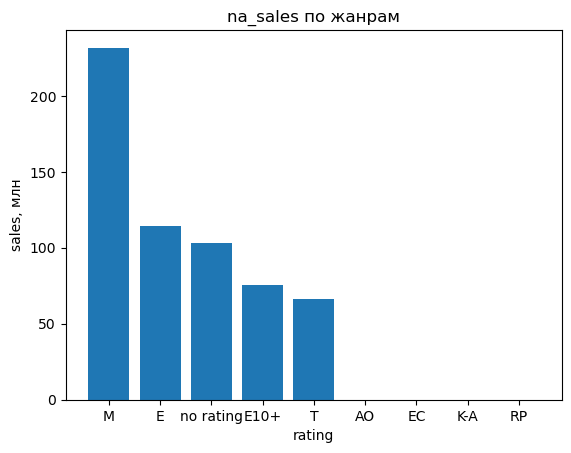

/var/folders/hj/fqskmm_j7yl8t2b6z10ntj2c0000gn/T/ipykernel_12163/682920882.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_rating = df_2012.groupby('rating')[column].sum().reset_index().sort_values(column, ascending=False)


,rating,eu_sales
5,M,194.44
1,E,113.03
8,no rating,91.52
2,E10+,55.38
7,T,53.05
6,RP,0.04
0,AO,0.00
3,EC,0.00
4,K-A,0.00


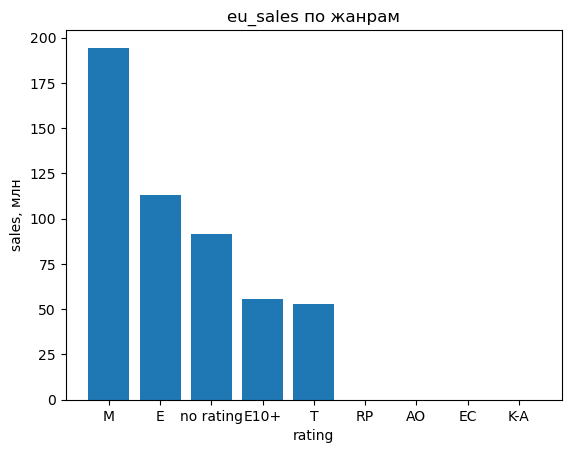

/var/folders/hj/fqskmm_j7yl8t2b6z10ntj2c0000gn/T/ipykernel_12163/682920882.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_rating = df_2012.groupby('rating')[column].sum().reset_index().sort_values(column, ascending=False)


,rating,jp_sales
8,no rating,108.87
1,E,28.33
7,T,26.09
5,M,21.20
2,E10+,8.19
0,AO,0.00
3,EC,0.00
4,K-A,0.00
6,RP,0.00


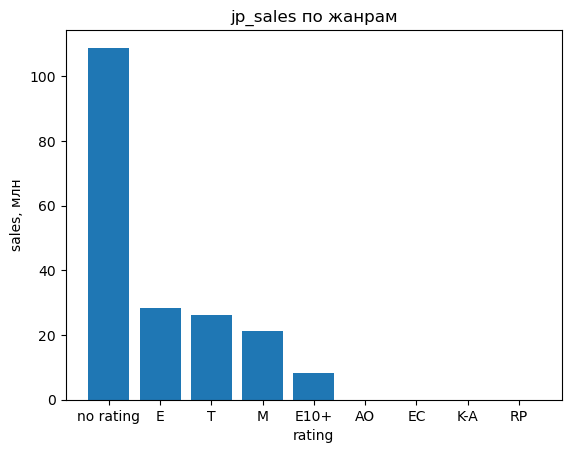

In [50]:
columns = ['na_sales', 'eu_sales', 'jp_sales']

for column in columns:
    total_sales_region = df_2012[column].sum()  # общие продажи в регионе
    top_rating = df_2012.groupby('rating')[column].sum().reset_index().sort_values(column, ascending=False)
    
    display(top_rating[['rating', column]])
    
    plt.figure()
    plt.bar(top_rating['rating'], top_rating[column])
    plt.title(f'{column} по жанрам')
    plt.xlabel('rating')
    plt.ylabel('sales, млн')
    plt.show()

**Выводы**

На японском рынке игр без рейтинга ESRB (США) больше, чем с таким рейтингом. Это просто большой локальный рынок. В Америке и Европе продаются одни и те же игры, и статистика по ним одинакова.

### Проверка гипотез

In [51]:
def check_hypothesis(ho, h1, alpha, sample_1, sample_2, equal_var=True):
    """
    Функция проверяет гипотезу о равенстве средних, используя t-критерий Стьюдента.
    
    Parameters
    ----------
    ho: string
        Нулевая гипотеза.
    h1: string
        Альтернативная гипотеза.
    alpha: float
        Уровень значимости.        
    sample_1: Pandas Dataframe
        Набор данных 1.
    sample_2: Pandas Dataframe
        Набор данных 1.
    equal_var: string
        True - значение по умолчанию. Параметр метода ttest_ind.
    
    Returns
    -------
    Функция возвращает None.
    """    
    
    # выводим гипотезы, уровень значимости
    print(f'H0 (нулевая гипотеза): {ho}')
    print(f'H1 (альтернативная гипотеза): {h1}')
    print(f'Уровень значимости: {alpha}')
    print('')
    
    # выводим среднее с дисперсию по сэмплам
    print('Sample_1')
    print(f'Среднее значение: {sample_1.mean():.2f}, дисперсия: {sample_1.var():.2f}')
    print('')
    
    print('Sample_2')
    print(f'Среднее значение: {sample_2.mean():.2f}, дисперсия: {sample_2.var():.2f}')
    print('')
    
    # применяем t-критерий Стьюдента из стандартного пакета
    results = st.ttest_ind(sample_1, sample_2, equal_var=equal_var)
    print(f'p-значение: {results.pvalue:.5f}')
    print('')
    
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: средний пользовательский рейтинг Xbox One = средний пользовательский рейтинг PC
<br>H1: средний пользовательский рейтинг Xbox One != средний пользовательский рейтинг PC

In [52]:
check_hypothesis('средний пользовательский рейтинг Xbox One = средний пользовательский рейтинг PC',
                 'средний пользовательский рейтинг Xbox One != средний пользовательский рейтинг PC',
                 0.05,
                 df_2012[df_2012['platform'] == 'XOne']['user_score'].notna(),
                 df_2012[df_2012['platform'] == 'PS4']['user_score'].notna(),
                 equal_var=False)

H0 (нулевая гипотеза): средний пользовательский рейтинг Xbox One = средний пользовательский рейтинг PC
H1 (альтернативная гипотеза): средний пользовательский рейтинг Xbox One != средний пользовательский рейтинг PC
Уровень значимости: 0.05

Sample_1
Среднее значение: 0.74, дисперсия: 0.19

Sample_2
Среднее значение: 0.66, дисперсия: 0.23

p-значение: 0.02836

Отвергаем нулевую гипотезу


Вероятность ошибиться, отвергнув нулевую гипотезу при том, что она верна, мала (p-value < 5%). Следовательно, можем уверенно сказать, что средний пользовательский рейтинг двух платформ разный.

#### Средние пользовательские рейтинги жанров Action и Sports разные

H0: средний пользовательский рейтинг жанра `Action` = средний пользовательский рейтинг жанра `Sports`
<br>H1: средний пользовательский рейтинг жанра `Action` != средний пользовательский рейтинг жанра `Sports`

In [53]:
check_hypothesis('средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports',
                 'средний пользовательский рейтинг жанра Action != средний пользовательский рейтинг жанра Sports',
                 0.05,
                 df_2012[df_2012['genre'] == 'Sports']['user_score'].notna(),
                 df_2012[df_2012['genre'] == 'Action']['user_score'].notna(),
                 equal_var=False)

H0 (нулевая гипотеза): средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports
H1 (альтернативная гипотеза): средний пользовательский рейтинг жанра Action != средний пользовательский рейтинг жанра Sports
Уровень значимости: 0.05

Sample_1
Среднее значение: 0.72, дисперсия: 0.20

Sample_2
Среднее значение: 0.51, дисперсия: 0.25

p-значение: 0.00000

Отвергаем нулевую гипотезу


Вероятность ошибиться, отвергнув нулевую гипотезу при том, что она верна, мала (p-value < 5%). Следовательно, можем уверенно сказать, что средний пользовательский рейтинг двух жанров разный.

#### Пояснения

В обоих случаях нулевой гипотезой служит гипотеза об отсутствии различий.

В обоих случаях проверялась гипотеза о равенстве средних двух генеральных совокупностей, так как выборки были разные в зависимости от платформы или жанра.

### Общий вывод

В процессе работы были найдены следующие закономерности:
- одновременное отсутствие значений в столбцах с оценками наблюдается, как минимум, у 70% пропущенных наблюдений. Либо у этих игр не было достаточно оценок для показа, либо в процессе выгрузки данных эти значения потерялись.

Были обработаны пропуски в:
- `name`: там одна и та же игра без названия дважды записалась в датасет. Восстановить невозможно, удалил. Возможная причина пропусков: техническая ошибка
- `year_of_release`: 269 пропусков годов выпуска были заполнены настоящими значениями. Возможная причина пропусков: отсутствие данных в исходной карточке игры, откуда собирались данные
- `critic_score, user_score`: пропущены 40-50 % данных, восстановить невозможно, удалить строки в таком количестве нельзя. Возможная причина пропусков: у некоторых игр просто нет оценок пользователей в том источнике, откуда брались данные, или оценок слишком мало, чтобы из них выводить общую оценку
- `rating`: пропущенные данные заменил на 'no rating', потому что в анализе это пригодится. Возможная причина пропусков: рейтинг выдаёт американское агентство, многие игры до него до ходят, в них не играют в Северной Америке, например


- Количество игр до 2007 года (медиана) равно количество игры после 2007 года: то есть за 10 последних лет было произведено столько же игр, сколько за 30 лет до этого.
- Самая популярная игра в Северной Америке и Европе продалась в количестве 41,36 и 28,96 млн копий соответственно — это игра "Wii Sports" для платформы Wii (2006 год). В Японии самой популярной игрой стала игра "Pokemon Red/Pokemon Blue" для платформы Game Boy (1996 год), продавшаяся в количестве 10,22 млн копий. На других рынках, самой популярной игрой стала Grand Theft Auto: San Andreas для Sony Play Station 2 (2004) с 10,57 млн копий.
- Рост количества выпускаемых игр начался в 1990 году. В 1990-х стали появляться игровые платформы (Super Nintendo, Sega Genesis, Game Boy) и распространились персональные компьютеры от Microsoft, Apple.
- В 2008 году был пик количества выпущенных игр — 999. Далее наступил экономический кризис, и возможно инвестиций на разработку не хватало, поэтому количество релизов начало снижаться. Также для выпуска конкурентоспособных игр была необходима компетенция в графике, которая только массово развивалась. Многие игры стали переходить в КПК, телефоны. В 2016 году было выпущено в 3 раза меньше игр, чем в 2008.

Жизненный цикл игровых платформ (отсчёт начинается с ненулевых продаж игр для данной платформы):
1. `PS2`: 12 лет (1999-2011, пик в 2002-2004)
2. `X360`: 12 лет и более (2004-2016 и далее, пик в 2010)
3. `PS3`: 11 лет и более (2005-2016 и далее, пик в 2011)
4. `Wii`: 10 лет (2005-2015, пик в 2009)
5. `DS`: 11 лет (2003-2014, пик в 2007)
6. `PS`: 12 лет (1992-2004, пик в 1998)
7. `GBA`: 8 лет (2000-2008, пик в 2004)
8. `PS4`: 4 года и более (2012-2016 и далее, пик в 2015)
9. `PSP`: 11 лет (2003-2014, пик в 2006)
10. `PC`: 24 года и более (1992-2016 и далее, пик в 2011)

Заметно, что игровые платформы живут 10-12 лет.

- У всех компаний продажи падают. Дольше остальных прибыль будут приность игры на PS4.
- Независимо от платформы, 99 % игр не продавалась более чем в 2 млн копий. Самой популярной игрой стала Grand Theft Auto V на PS3. Самой успешной платформой можно назвать Xbox 360, потому что у этой платформы самая большая медиана, самый широкий межквартильный размах, самая длинный верхний (правый) ус — это говорит о том, что в среднем игра на этой платформе будет чуть правее на графике, т. е. число проданных копий в среднем для игр будет чуть выше. Самой неуспешной платформой можно назвать PSP. Самая продаваемая игра здесь не превышает 400 тысяч копий.
- Связь между продажами и оценкой критиков и пользователей — слабая. Более, того она разнонаправленная: corr=0.4 и corr=-0.3. Следовательно, логически связать эти показатели невозможно. Единственное, за что можно зацепиться в анализе — корреляция 0.5 между `'user_score', 'critic_score'`, чего явно не достаточно для построения логических связей. Подтвердилось отсутствие хотя бы средней силы связи >|0.5| между переменными с достаточным количеством наблюдений.

*(справочно: если коэффициент окупаемости `sales_count_ratio` равен 1, то доля выпущенных игр равна доле проданных копий; если коэффициент больше 1, то меньшее количество игр заняло большую часть рынка)*

- 30-35 % игр по количеству релизов и по количеству проданных копий занимают игры жанра `Action`
- 51 % проданных копий занимают всего два жанра: `Action, Shooter`
- 67 % проданных копий занимают всего 4 жанра:`Action, Shooter, Role-Playing, Sports`
- самым прибыльным жанром можно считать шутеры: коэффициент окупаемости равен 2.6
- самыми неприбыльными жанрами являются `Adventure, Strategy, Puzzle`

В Северной Америке самая популярна платформа — Xbox 360 от Microsoft (24 %), в Европе — Sony Play Station 4 от японской компании Sony (28 %), а в самой Японии 46% рынка с 2012 года заняла Nintendo 3DS от отечественной компании Nintendo.

Мировые лидеры и антогонисты — PS4 и Xbox360 — имеют разную популярность на разных рынках:
- В Северной Америке на них приходится 42 % рынка
- В Европе на них приходится 49 % рынка
- В Японии на них приходится 9 % рынка (отдельно посмотрел топ-N платформ)


- В Японии не играют в шутеры и спортивные игры. Зато симуляторы и игры, не попадающие ни в один укрупнённый жанр, занимают 12 % рынка, тогда как в остальных регионах — 7-8 %
- Жанр RPG является самым популярным в Японии (34 %), а в Европе и Северной Америке занимает только 10 % продаж
- По первым 4 позициям предпочтения игроков в Северной Америке и Европе одинаковы


- На японском рынке игр без рейтинга ESRB (США) больше, чем с таким рейтингом. Это просто большой локальный рынок. В Америке и Европе продаются одни и те же игры, и статистика по ним одинакова.

**Результаты проверки гипотез:**
 - средний пользовательский рейтинг платформ Xbox One и PC разный
 - средний пользовательский рейтинг жанров Action и Sports разный
 
В обоих случаях нулевой гипотезой служит гипотеза об отсутствии различий и проверялась гипотеза о равенстве средних двух генеральных совокупностей, так как выборки были разные в зависимости от платформы или жанра.